##0_Collecting Data+



In [ ]:
!pip install statsmodels

In [ ]:
#Import Library for dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Featuring
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

###Prepare Data

In [ ]:
df_store = pd.read_csv('/content/store5.csv')

In [ ]:
df_store

id        date  store_nbr                      family     sales  \
0         1452  2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453  2013-01-01          5                   BABY CARE     0.000   
2         1454  2013-01-01          5                      BEAUTY     0.000   
3         1455  2013-01-01          5                   BEVERAGES     0.000   
4         1456  2013-01-01          5                       BOOKS     0.000   
...        ...         ...        ...                         ...       ...   
55567  3000586  2017-08-15          5                     POULTRY   241.011   
55568  3000587  2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588  2017-08-15          5                     PRODUCE  1357.823   
55570  3000589  2017-08-15          5  SCHOOL AND OFFICE SUPPLIES     0.000   
55571  3000590  2017-08-15          5                     SEAFOOD     9.669   

       onpromotion  dcoilwtico  
0                0         NaN  
1                0         NaN  
2                0         NaN  
3                0         NaN  
4                0         NaN  
...            ...         ...  
55567            1       47.57  
55568            0       47.57  
55569            4       47.57  
55570            0       47.57  
55571            0       47.57  

[55572 rows x 7 columns]

In [ ]:
for column in df_store.columns:
    print('{} - Unique Values: {}'.format(column, df_store[column].unique()))

id - Unique Values: [   1452    1453    1454 ... 3000588 3000589 3000590]
date - Unique Values: ['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
store_nbr - Unique Values: [5]
family - Unique Values: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
sales - Unique Values: [   0.       6.       7.    ...   52.121 1357.823    9.669]
onpromotion - Unique Values: [  0   2   1   5   7  49  22  33  21   4   3   6  10 140  54  25  34  18
  13   8 131  53  12  35  20  14 135  47  37  19  16   9 133  11 144  24
  32  28  46  15  52  23  31  30  17 139  29

In [ ]:
df_store.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     17193
dtype: int64

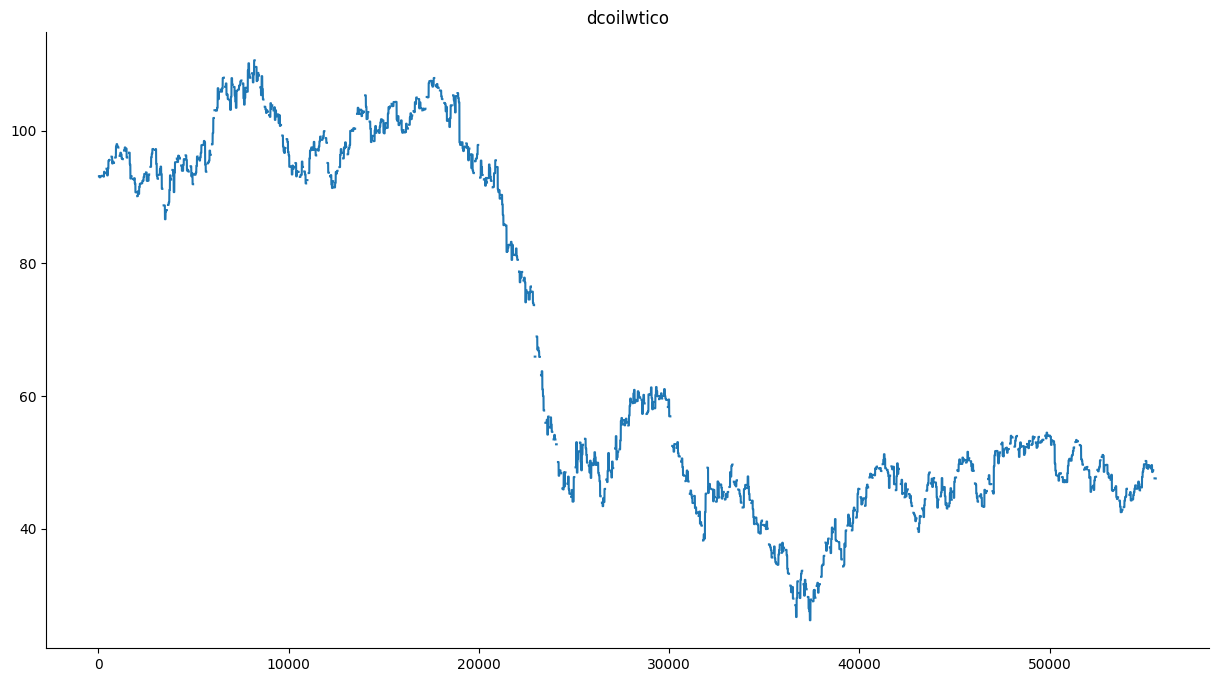

In [ ]:
# @title dcoilwtico

df_store['dcoilwtico'].plot(kind='line', figsize=(15, 8), title='dcoilwtico')
plt.gca().spines[['top', 'right']].set_visible(False)

###Cleaning Data

In [ ]:
df_store.drop(['id', 'store_nbr'], axis=1, inplace=True)

In [ ]:
df_store

date                      family     sales  onpromotion  \
0      2013-01-01                  AUTOMOTIVE     0.000            0   
1      2013-01-01                   BABY CARE     0.000            0   
2      2013-01-01                      BEAUTY     0.000            0   
3      2013-01-01                   BEVERAGES     0.000            0   
4      2013-01-01                       BOOKS     0.000            0   
...           ...                         ...       ...          ...   
55567  2017-08-15                     POULTRY   241.011            1   
55568  2017-08-15              PREPARED FOODS    52.121            0   
55569  2017-08-15                     PRODUCE  1357.823            4   
55570  2017-08-15  SCHOOL AND OFFICE SUPPLIES     0.000            0   
55571  2017-08-15                     SEAFOOD     9.669            0   

       dcoilwtico  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
55567       47.57  
55568       47.57  
55569       47.57  
55570       47.57  
55571       47.57  

[55572 rows x 5 columns]

In [ ]:
df_train = df_store.copy()

In [ ]:
df_store['date'] = pd.to_datetime(df_store['date'])
# sort by date
#df_store = df_store.set_index('date', inplace=True)
df_store = df_store.set_index('date')
df_store

family     sales  onpromotion  dcoilwtico
date                                                                     
2013-01-01                  AUTOMOTIVE     0.000            0         NaN
2013-01-01                   BABY CARE     0.000            0         NaN
2013-01-01                      BEAUTY     0.000            0         NaN
2013-01-01                   BEVERAGES     0.000            0         NaN
2013-01-01                       BOOKS     0.000            0         NaN
...                                ...       ...          ...         ...
2017-08-15                     POULTRY   241.011            1       47.57
2017-08-15              PREPARED FOODS    52.121            0       47.57
2017-08-15                     PRODUCE  1357.823            4       47.57
2017-08-15  SCHOOL AND OFFICE SUPPLIES     0.000            0       47.57
2017-08-15                     SEAFOOD     9.669            0       47.57

[55572 rows x 4 columns]

#1_Explore Data Analysis

family - Unique Values: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']

##This case focused on Hardware and EEGS

In [ ]:
# Total penjualan per family
df_store.groupby('family')['sales'].sum().sort_values(ascending=False)

family
GROCERY I                     5.262682e+06
BEVERAGES                     2.533831e+06
CLEANING                      1.667748e+06
PRODUCE                       1.653582e+06
DAIRY                         8.712830e+05
BREAD/BAKERY                  6.428546e+05
MEATS                         4.771044e+05
PERSONAL CARE                 4.501660e+05
POULTRY                       4.196304e+05
DELI                          4.152710e+05
FROZEN FOODS                  2.696692e+05
HOME CARE                     2.392830e+05
EGGS                          1.908510e+05
PREPARED FOODS                1.479911e+05
LIQUOR,WINE,BEER              1.104140e+05
HOME AND KITCHEN II           3.723800e+04
GROCERY II                    3.324100e+04
LINGERIE                      3.156100e+04
HOME AND KITCHEN I            3.010700e+04
CELEBRATION                   2.617600e+04
SEAFOOD                       2.235899e+04
LADIESWEAR                    1.481300e+04
AUTOMOTIVE                    9.194000e+03
BEAU

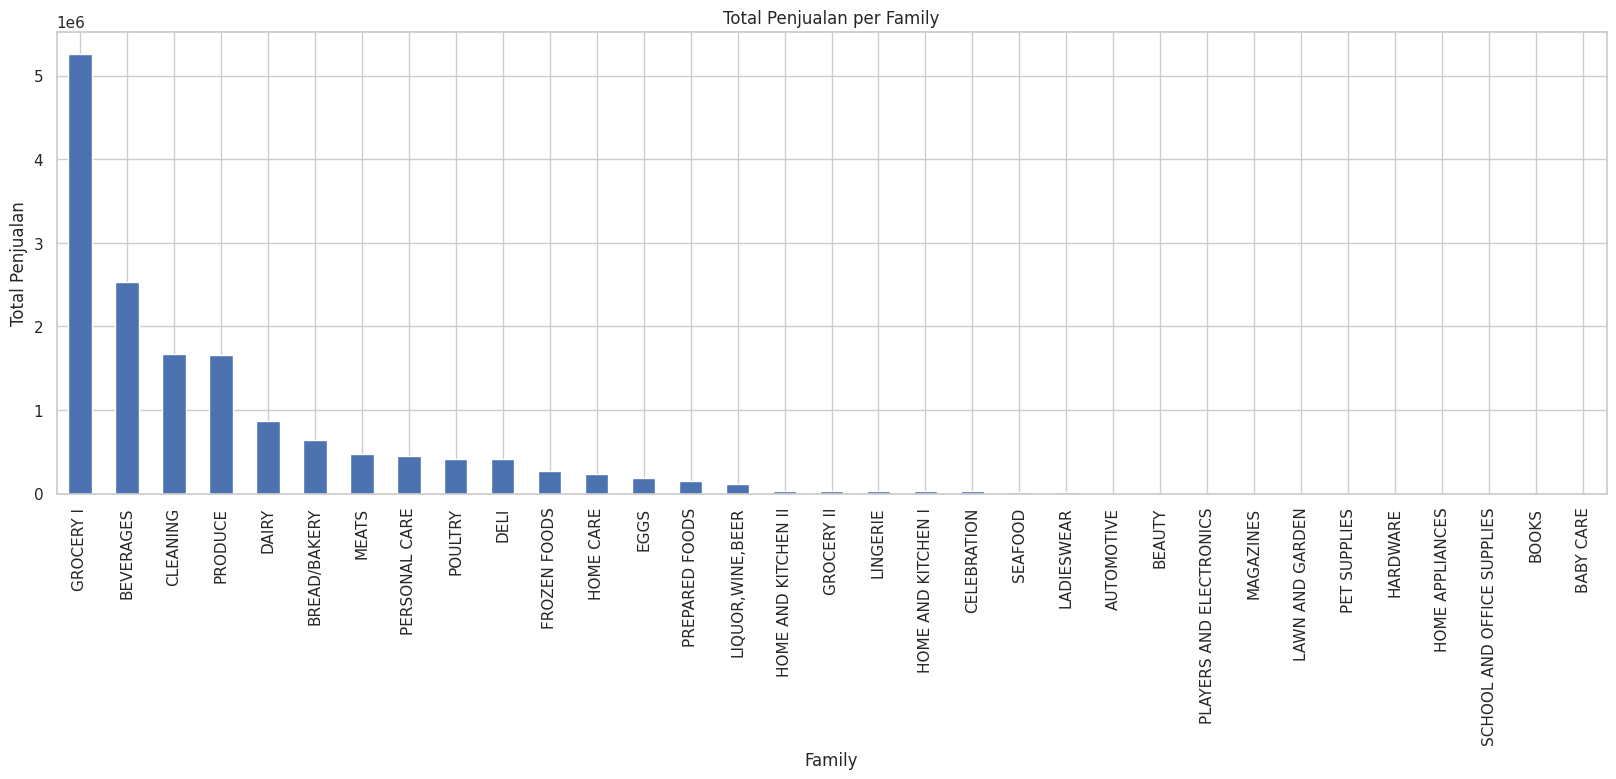

In [ ]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')

# Gunakan fungsi groupby dan sum untuk menghitung total penjualan per family
df_store.groupby('family')['sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Penjualan per Family')
plt.xlabel('Family')
plt.ylabel('Total Penjualan')
plt.show()

In [ ]:
hardware = df_store['family']=='HARDWARE'
hardware = df_store[hardware]
hardware

family  sales  onpromotion  dcoilwtico
date                                                
2013-01-01  HARDWARE    0.0            0         NaN
2013-01-02  HARDWARE    3.0            0       93.14
2013-01-03  HARDWARE    0.0            0       92.97
2013-01-04  HARDWARE    1.0            0       93.12
2013-01-05  HARDWARE    1.0            0         NaN
...              ...    ...          ...         ...
2017-08-11  HARDWARE    2.0            0       48.81
2017-08-12  HARDWARE    1.0            0         NaN
2017-08-13  HARDWARE    3.0            0         NaN
2017-08-14  HARDWARE    1.0            0       47.59
2017-08-15  HARDWARE    0.0            0       47.57

[1684 rows x 4 columns]

In [ ]:
eggs = df_store['family']=='EGGS'
eggs = df_store[eggs]
eggs

family  sales  onpromotion  dcoilwtico
date                                             
2013-01-01   EGGS    0.0            0         NaN
2013-01-02   EGGS  246.0            0       93.14
2013-01-03   EGGS  120.0            0       92.97
2013-01-04   EGGS  141.0            0       93.12
2013-01-05   EGGS  143.0            0         NaN
...           ...    ...          ...         ...
2017-08-11   EGGS   95.0           24       48.81
2017-08-12   EGGS   77.0            0         NaN
2017-08-13   EGGS  100.0            0         NaN
2017-08-14   EGGS   85.0            0       47.59
2017-08-15   EGGS   68.0            0       47.57

[1684 rows x 4 columns]

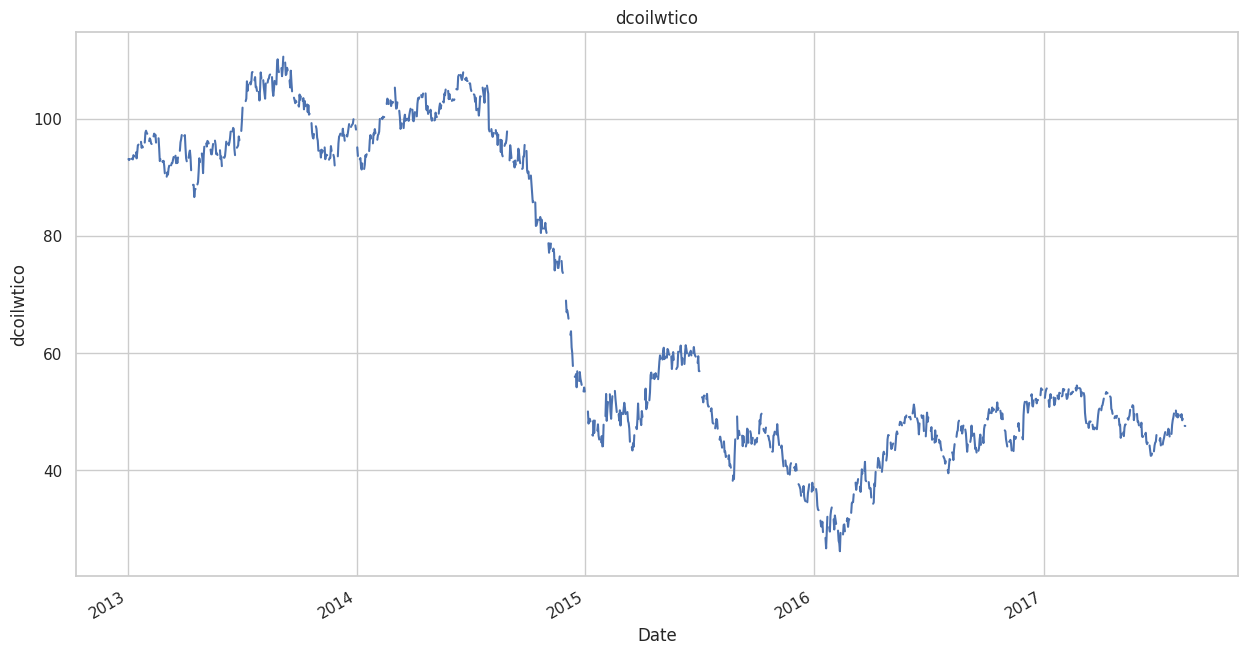

In [ ]:
# Melihat dcoilwtico
# Membuat dcoilwitco menjadi dataset terpisah, lalu mengubah indexnya
# take dcoilwitco based on date
dcoilwtico = df_store['family']=='HARDWARE'
dcoilwtico = df_store[dcoilwtico]
# Only take date and dcoilwtico
dcoilwtico = dcoilwtico['dcoilwtico']

# Plot dcoilwtico
plt.figure (figsize=(15, 8))
dcoilwtico.plot()
plt.title('dcoilwtico')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.show()

##EDA for Hardware

###Plotting Hardware Sales Promotion

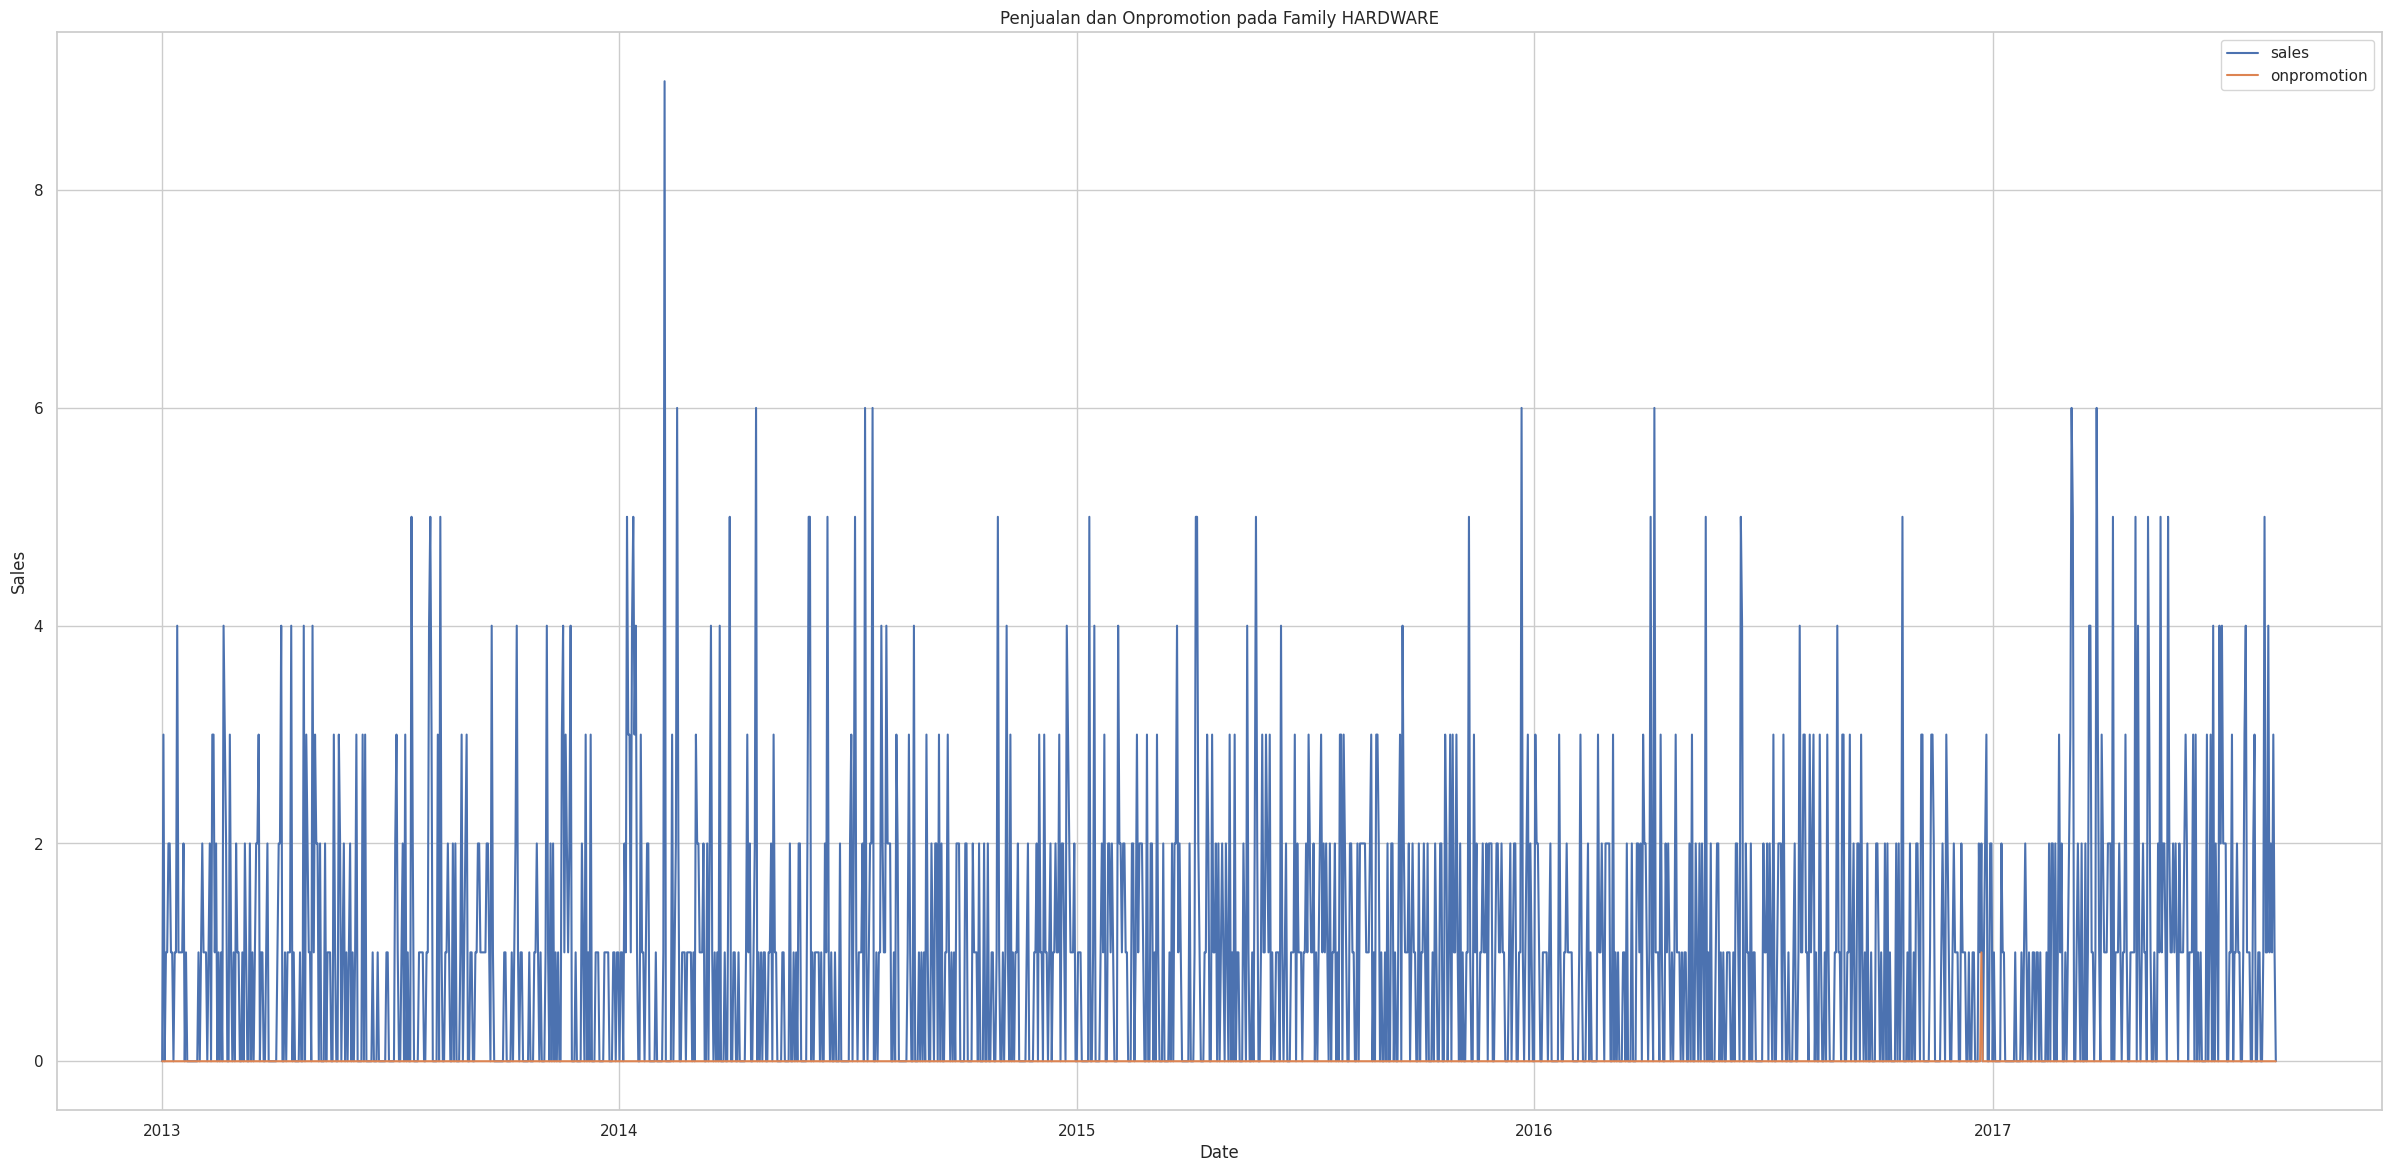

In [ ]:
plt.figure(figsize=(30,14))
sns.set(style='whitegrid')
sns.lineplot(data=hardware, x='date', y='sales', label='sales')
sns.lineplot(data=hardware, x='date', y='onpromotion', label='onpromotion')
plt.title('Penjualan dan Onpromotion pada Family HARDWARE')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

###Plotting Hardware Sales

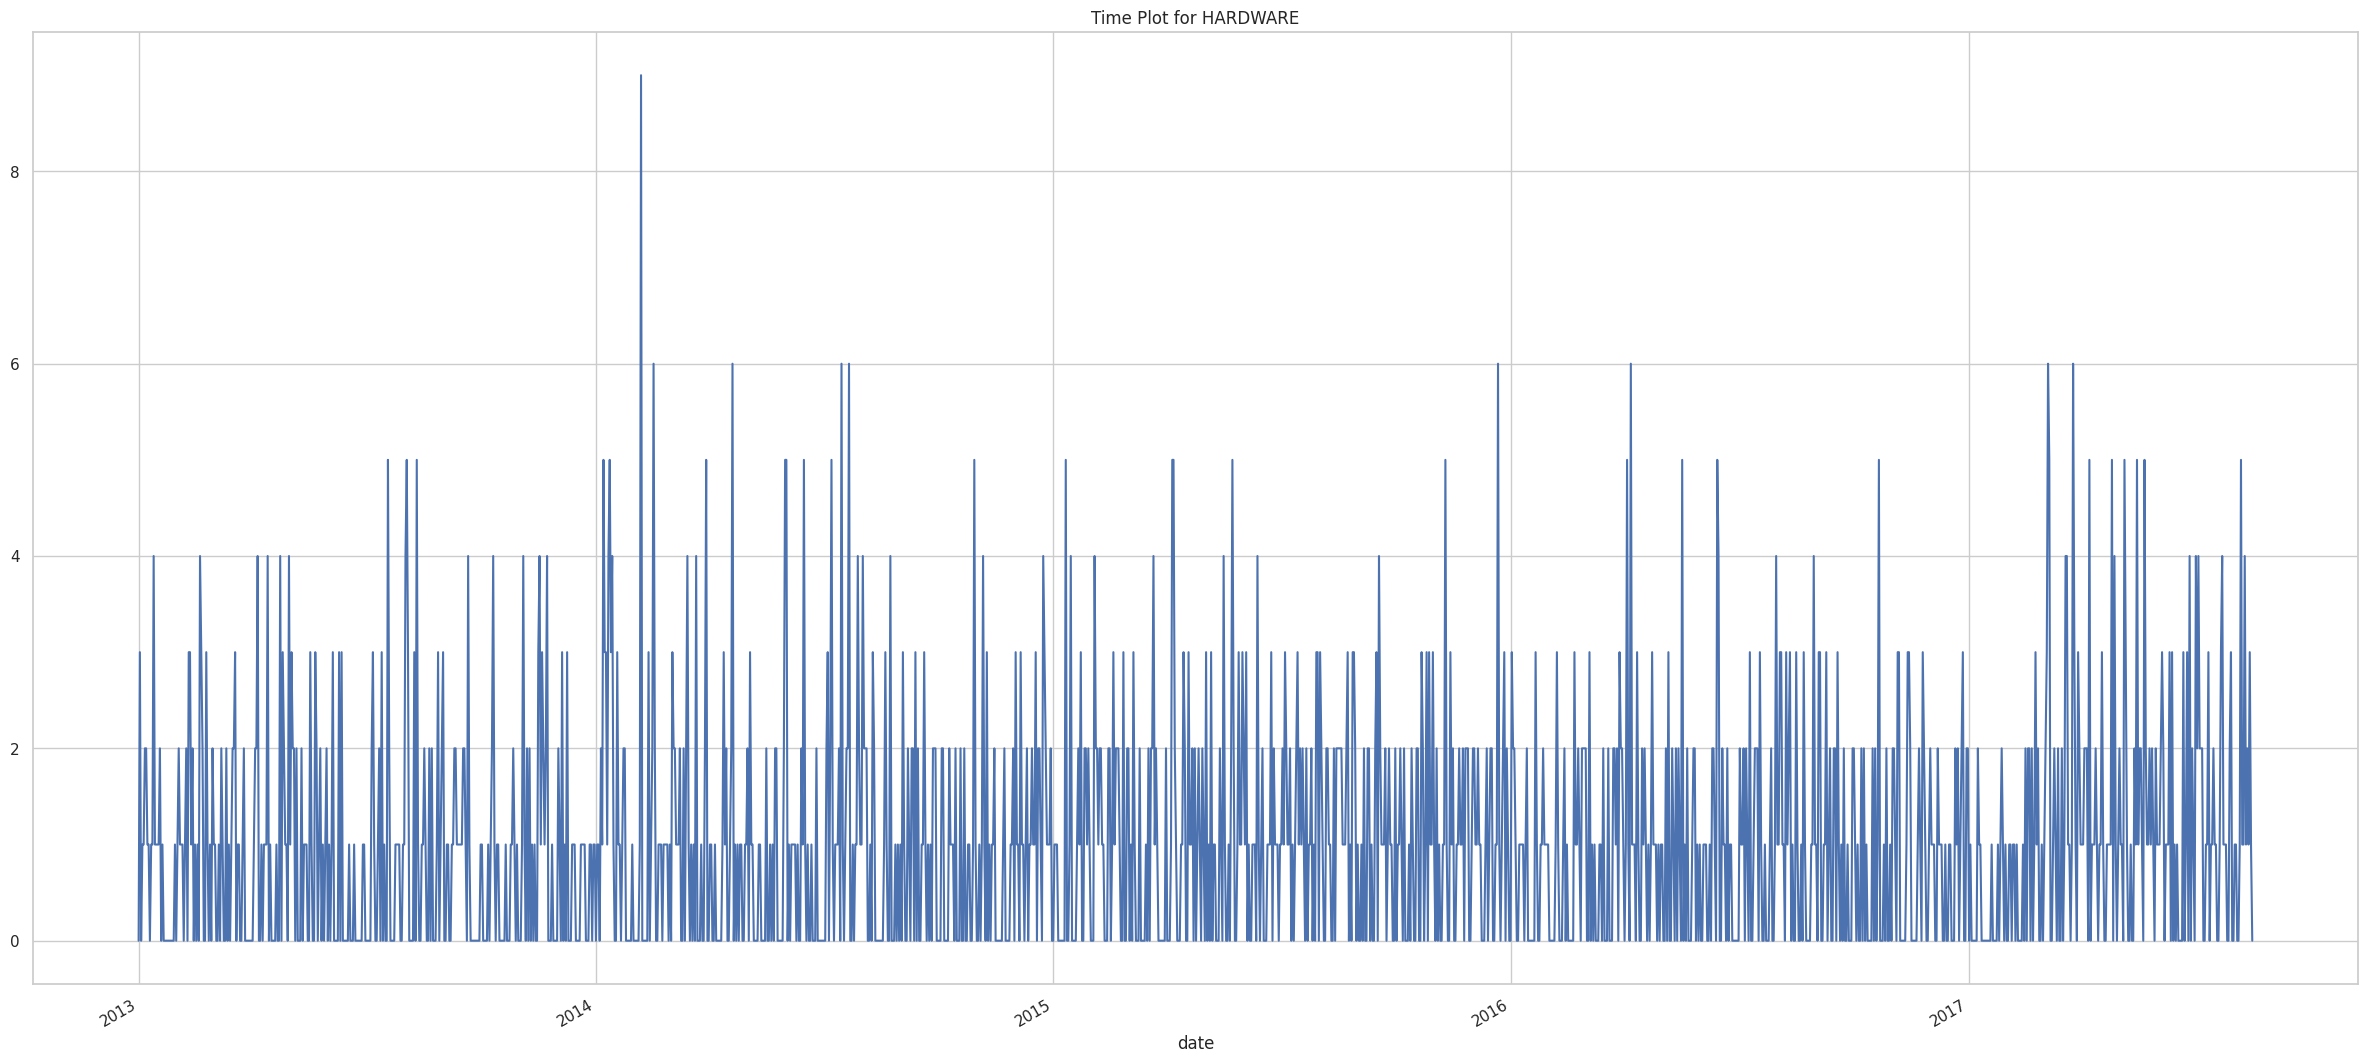

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))

hardware['sales'].plot()
plt.title('Time Plot for HARDWARE')
plt.show()

###Disgust Date, Month, Year, and weekday via plotting

In [ ]:
hardware = hardware.copy()

In [ ]:
hardware

family  sales  onpromotion  dcoilwtico
date                                                
2013-01-01  HARDWARE    0.0            0         NaN
2013-01-02  HARDWARE    3.0            0       93.14
2013-01-03  HARDWARE    0.0            0       92.97
2013-01-04  HARDWARE    1.0            0       93.12
2013-01-05  HARDWARE    1.0            0         NaN
...              ...    ...          ...         ...
2017-08-11  HARDWARE    2.0            0       48.81
2017-08-12  HARDWARE    1.0            0         NaN
2017-08-13  HARDWARE    3.0            0         NaN
2017-08-14  HARDWARE    1.0            0       47.59
2017-08-15  HARDWARE    0.0            0       47.57

[1684 rows x 4 columns]

In [ ]:
if isinstance(hardware, pd.DataFrame):  # Check if hardware is a DataFrame
    hardware['year'] = hardware.index.year
    hardware['month'] = hardware.index.month
    hardware['week'] = hardware.index.week
    hardware['day'] = hardware.index.day
    hardware['weekday'] = hardware.index.weekday
else:
    print("hardware is not a DataFrame. Please check your data loading or creation.")

<ipython-input-21-3462a5f86f0e>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  hardware['week'] = hardware.index.week


In [ ]:
hardware

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                           
2013-01-01  HARDWARE    0.0            0         NaN  2013      1     1    1   
2013-01-02  HARDWARE    3.0            0       93.14  2013      1     1    2   
2013-01-03  HARDWARE    0.0            0       92.97  2013      1     1    3   
2013-01-04  HARDWARE    1.0            0       93.12  2013      1     1    4   
2013-01-05  HARDWARE    1.0            0         NaN  2013      1     1    5   
...              ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11  HARDWARE    2.0            0       48.81  2017      8    32   11   
2017-08-12  HARDWARE    1.0            0         NaN  2017      8    32   12   
2017-08-13  HARDWARE    3.0            0         NaN  2017      8    32   13   
2017-08-14  HARDWARE    1.0            0       47.59  2017      8    33   14   
2017-08-15  HARDWARE    0.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

<ipython-input-23-dce48b8af869>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='sales', data= hardware, palette='viridis')


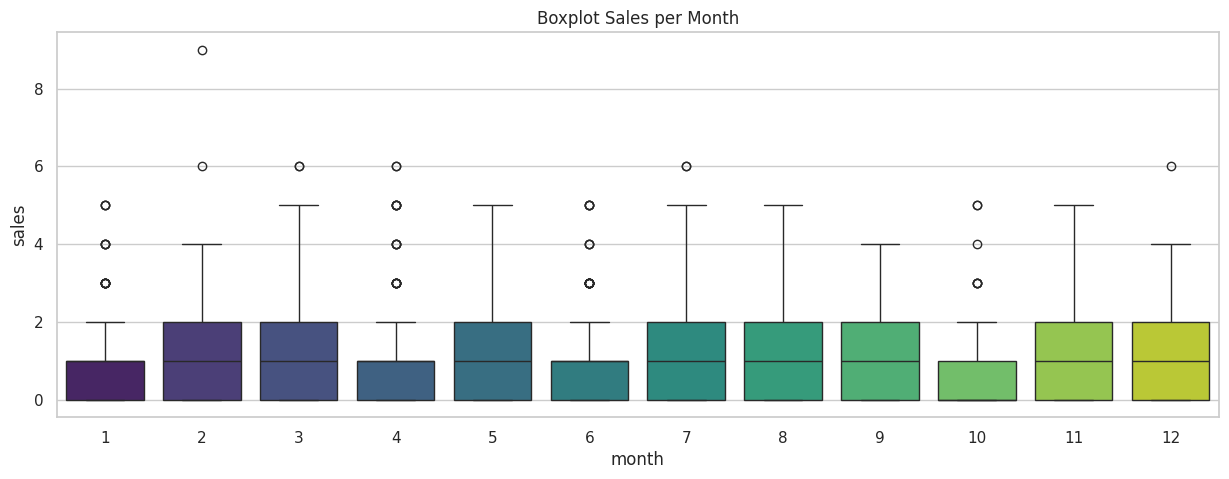

In [ ]:
# Visualisasi data berdasarkan bulan dengan boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='month', y='sales', data= hardware, palette='viridis')
plt.title('Boxplot Sales per Month')
plt.show()

<ipython-input-24-e36db5c5ad0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='sales', data= hardware, palette='viridis')


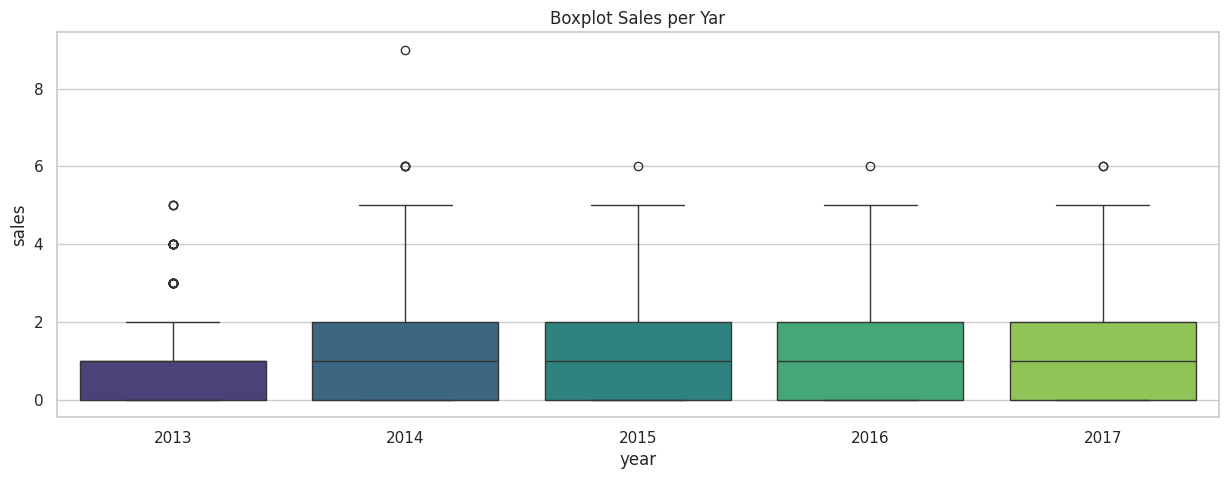

In [ ]:
# Visualisasi data berdasarkan tahun dengan boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='year', y='sales', data= hardware, palette='viridis')
plt.title('Boxplot Sales per Yar')
plt.show()

In [ ]:
hardware

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                           
2013-01-01  HARDWARE    0.0            0         NaN  2013      1     1    1   
2013-01-02  HARDWARE    3.0            0       93.14  2013      1     1    2   
2013-01-03  HARDWARE    0.0            0       92.97  2013      1     1    3   
2013-01-04  HARDWARE    1.0            0       93.12  2013      1     1    4   
2013-01-05  HARDWARE    1.0            0         NaN  2013      1     1    5   
...              ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11  HARDWARE    2.0            0       48.81  2017      8    32   11   
2017-08-12  HARDWARE    1.0            0         NaN  2017      8    32   12   
2017-08-13  HARDWARE    3.0            0         NaN  2017      8    32   13   
2017-08-14  HARDWARE    1.0            0       47.59  2017      8    33   14   
2017-08-15  HARDWARE    0.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
print(hardware.columns)

Index(['family', 'sales', 'onpromotion', 'dcoilwtico', 'year', 'month', 'week',
       'day', 'weekday'],
      dtype='object')


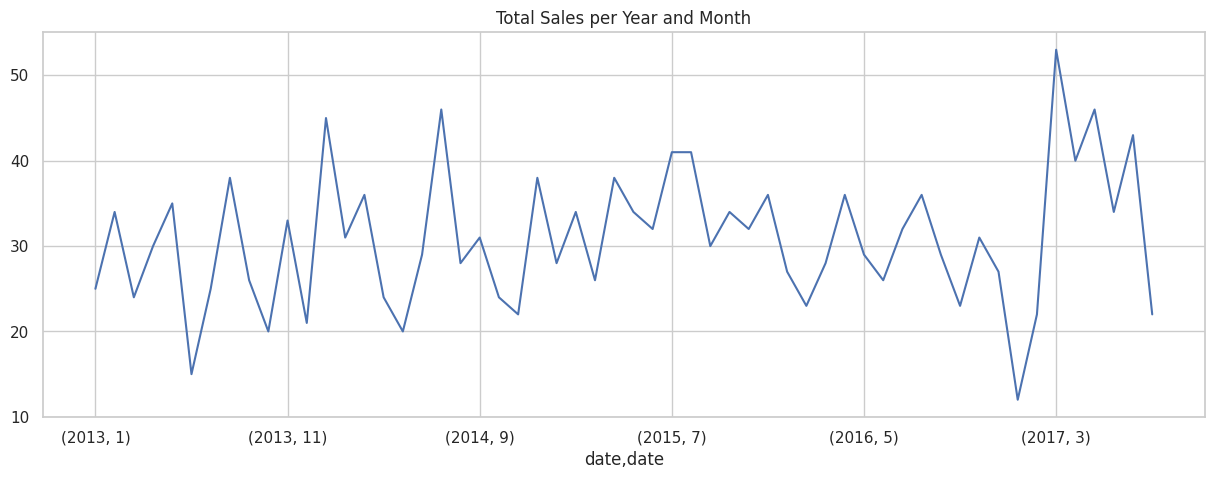

In [ ]:
# Membuat total transaksi per tahun dan bulan

# Membuat visualisasi data berdasarkan tahun dan bulan
plt.figure(figsize=(15, 5))
hardware.groupby([hardware.index.year, hardware.index.month])['sales'].sum().plot()
plt.title('Total Sales per Year and Month')
plt.show()

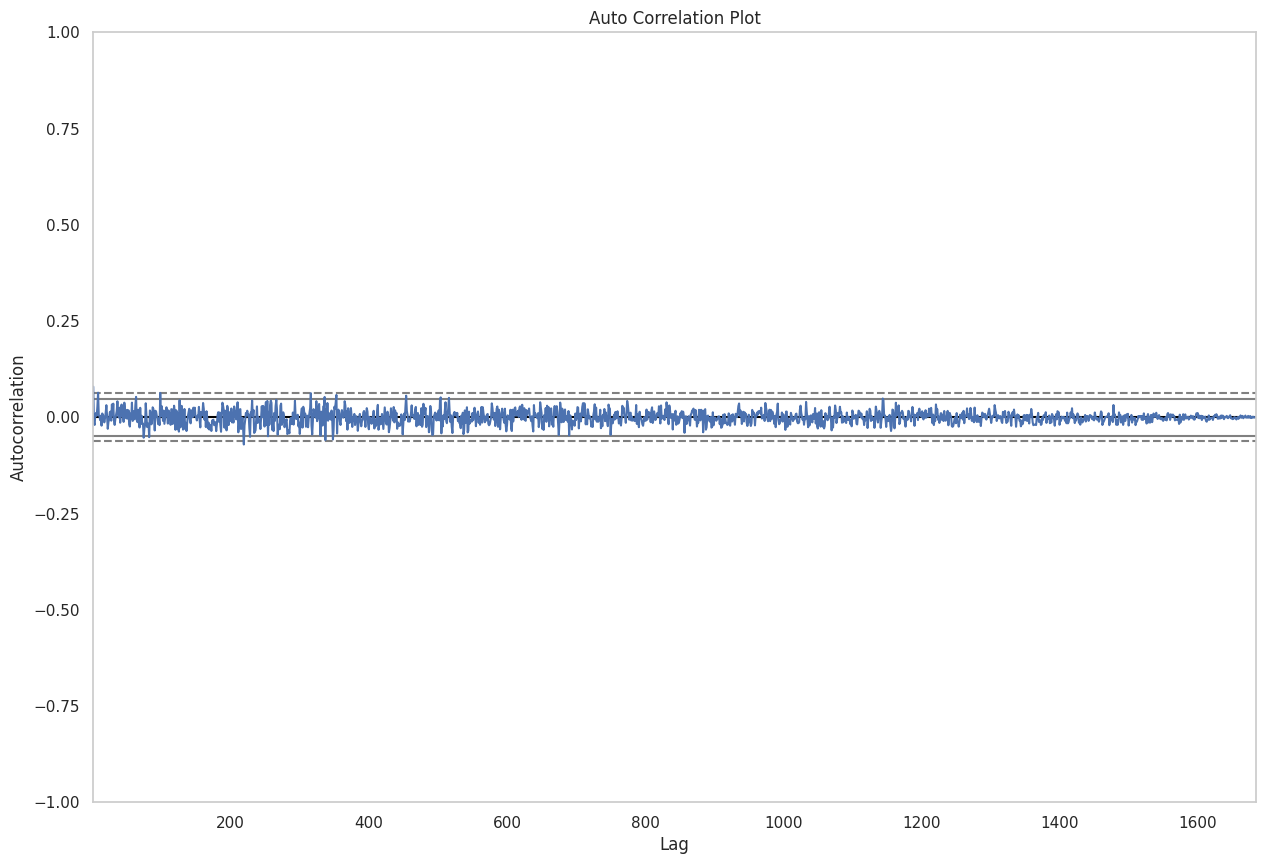

In [ ]:
#@ Auto Correlation Plot
plt.figure(figsize=(15, 10))
autocorrelation_plot(hardware['sales'])
plt.title('Auto Correlation Plot')
plt.show()

###Decomposition

<Axes: xlabel='date'>

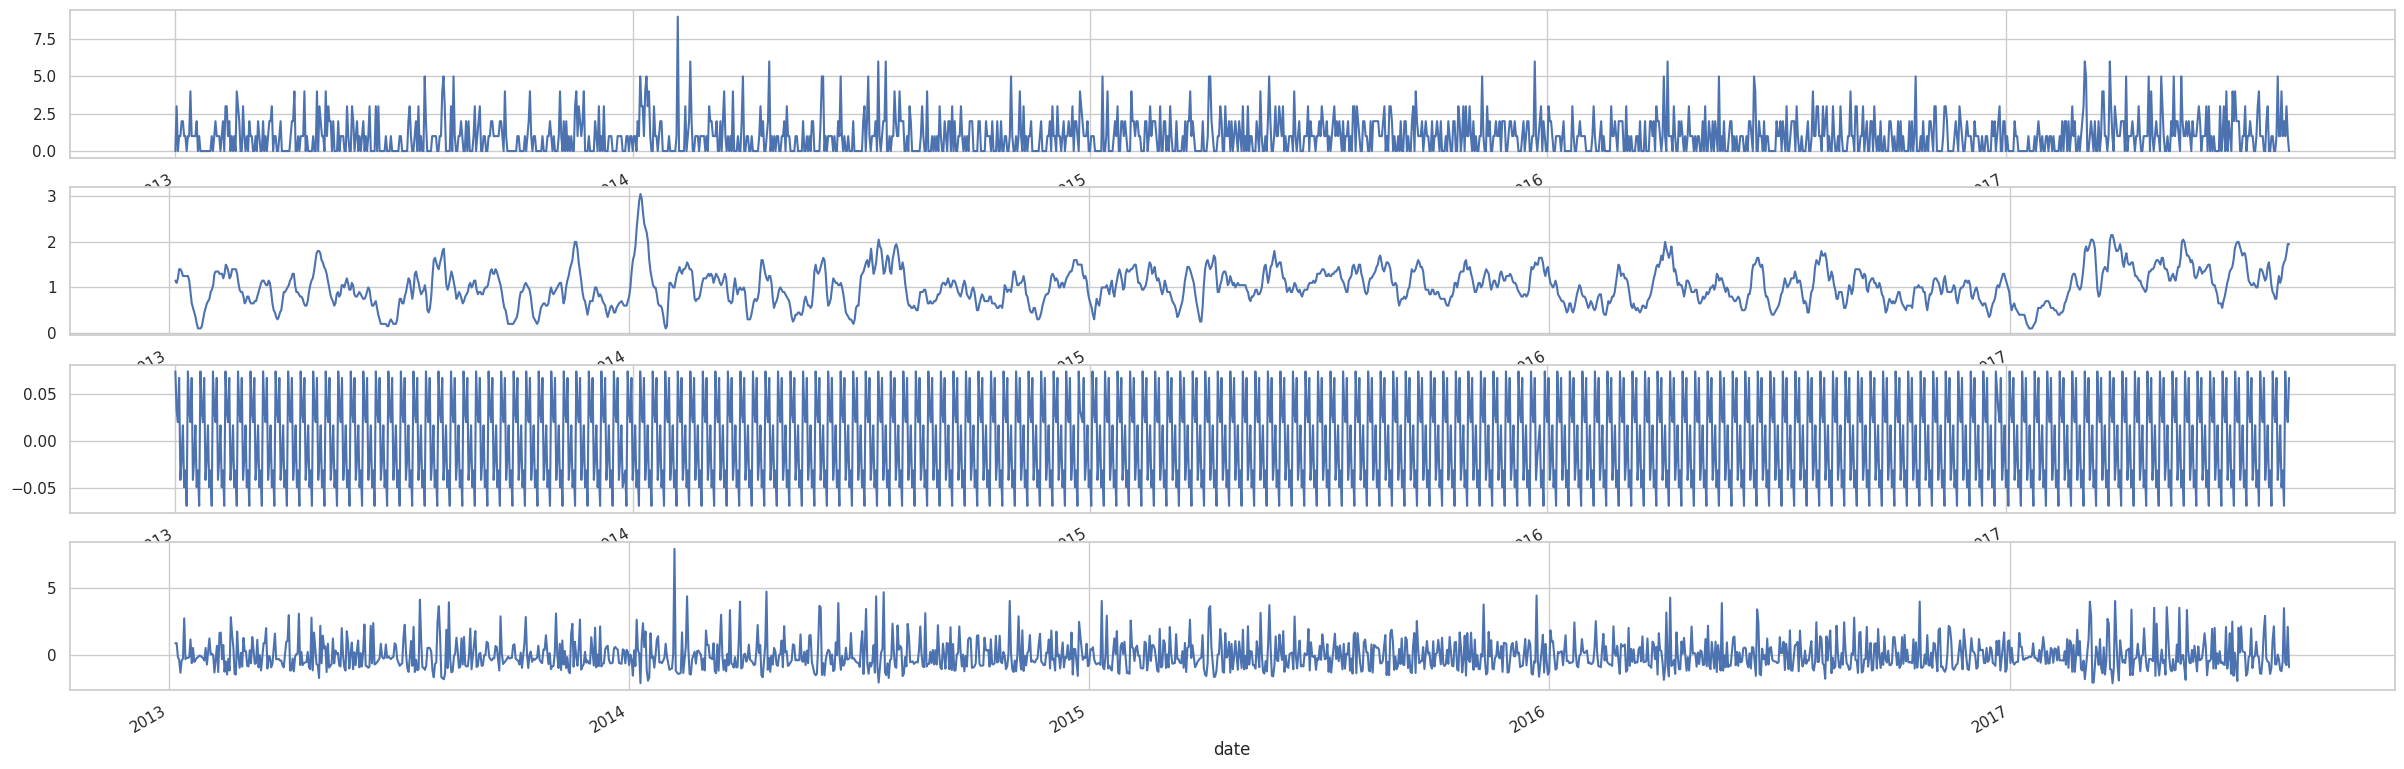

In [ ]:
# Decompose data transactions
plot_decompose = seasonal_decompose(hardware['sales'], model='additive', period=10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 10))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Axes: xlabel='date'>

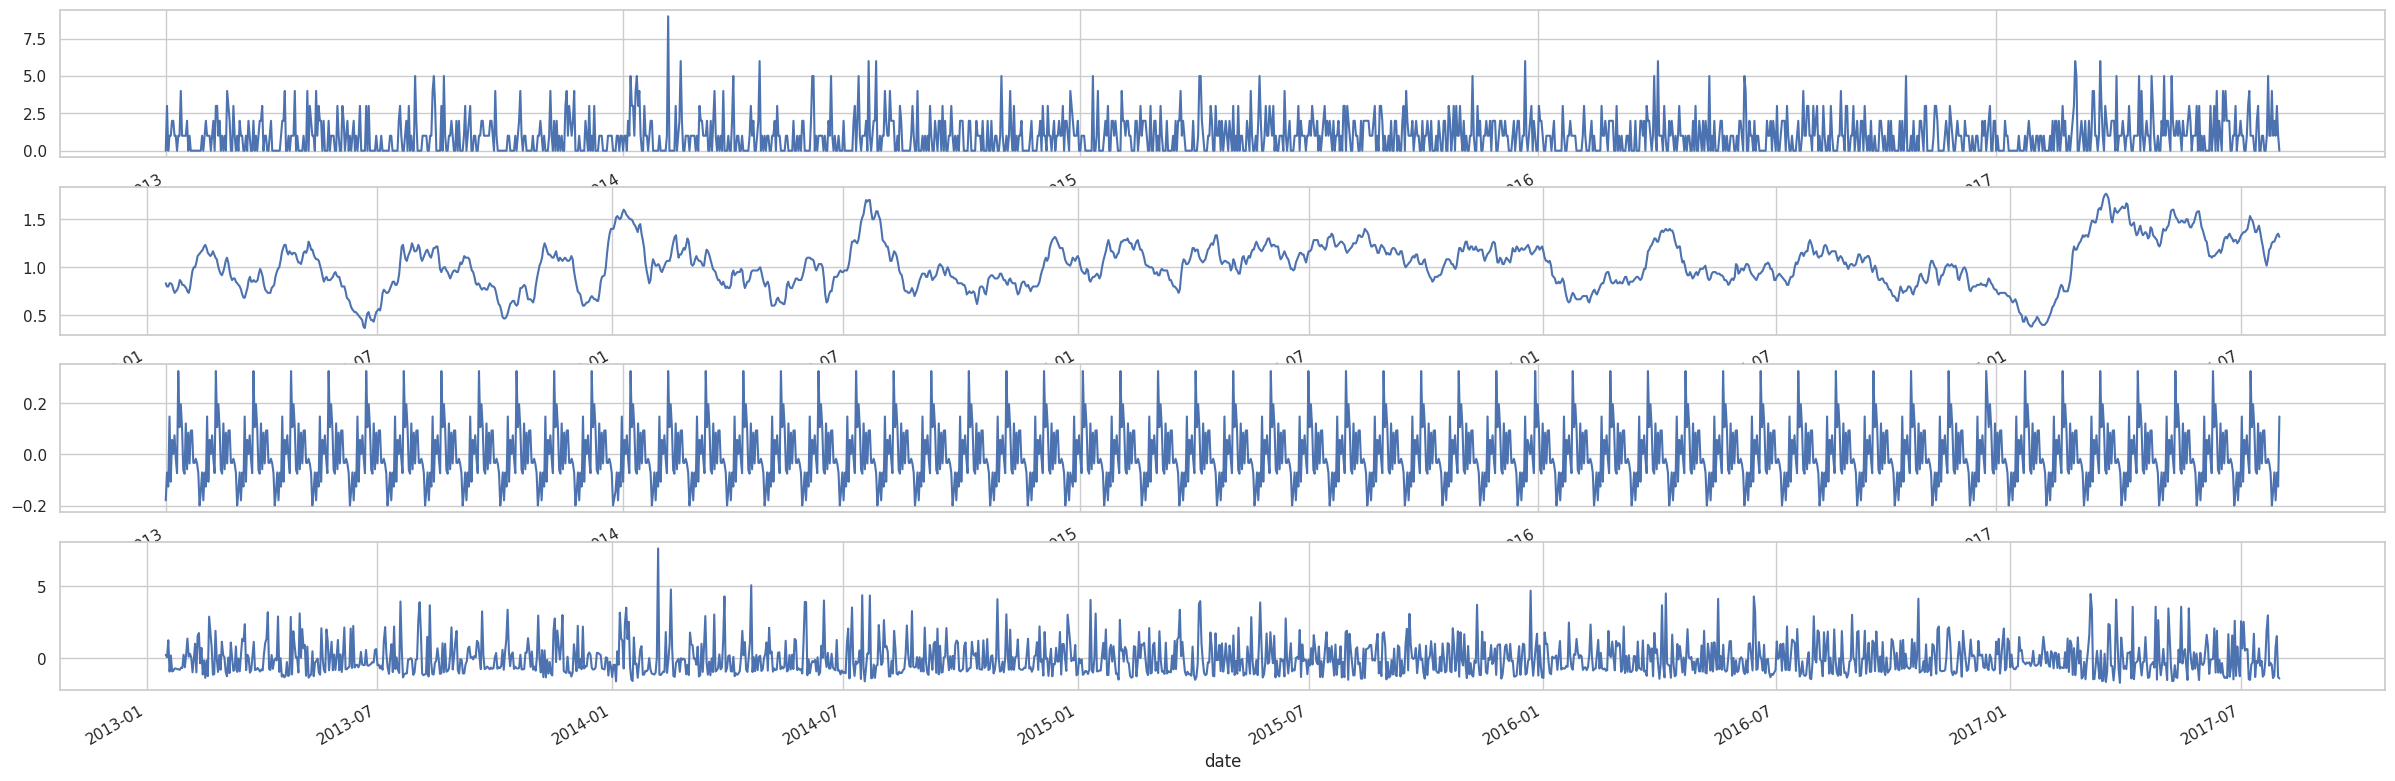

In [ ]:
# Decompose data transactions
plot_decompose = seasonal_decompose(hardware['sales'], model='additive', period=30)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 10))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Axes: xlabel='date'>

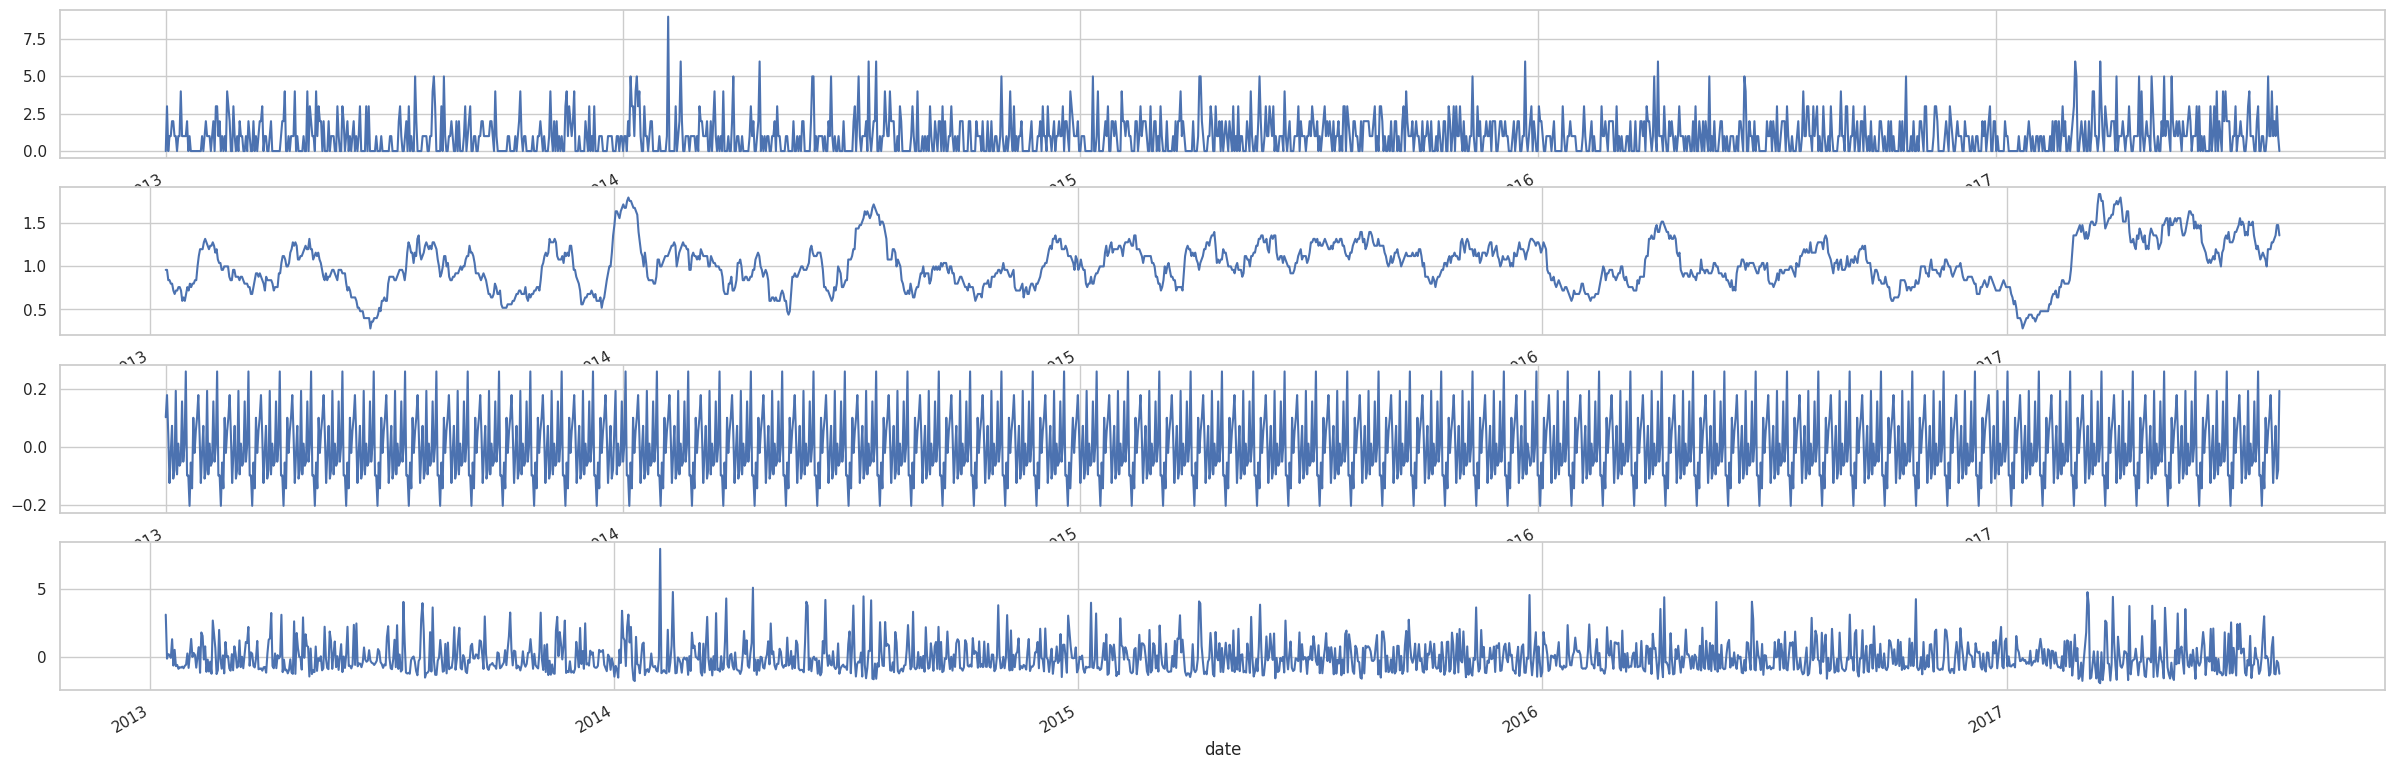

In [ ]:
# Decompose data transactions
plot_decompose = seasonal_decompose(hardware['sales'], model='additive', period=25)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 10))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Figure size 2500x1500 with 0 Axes>

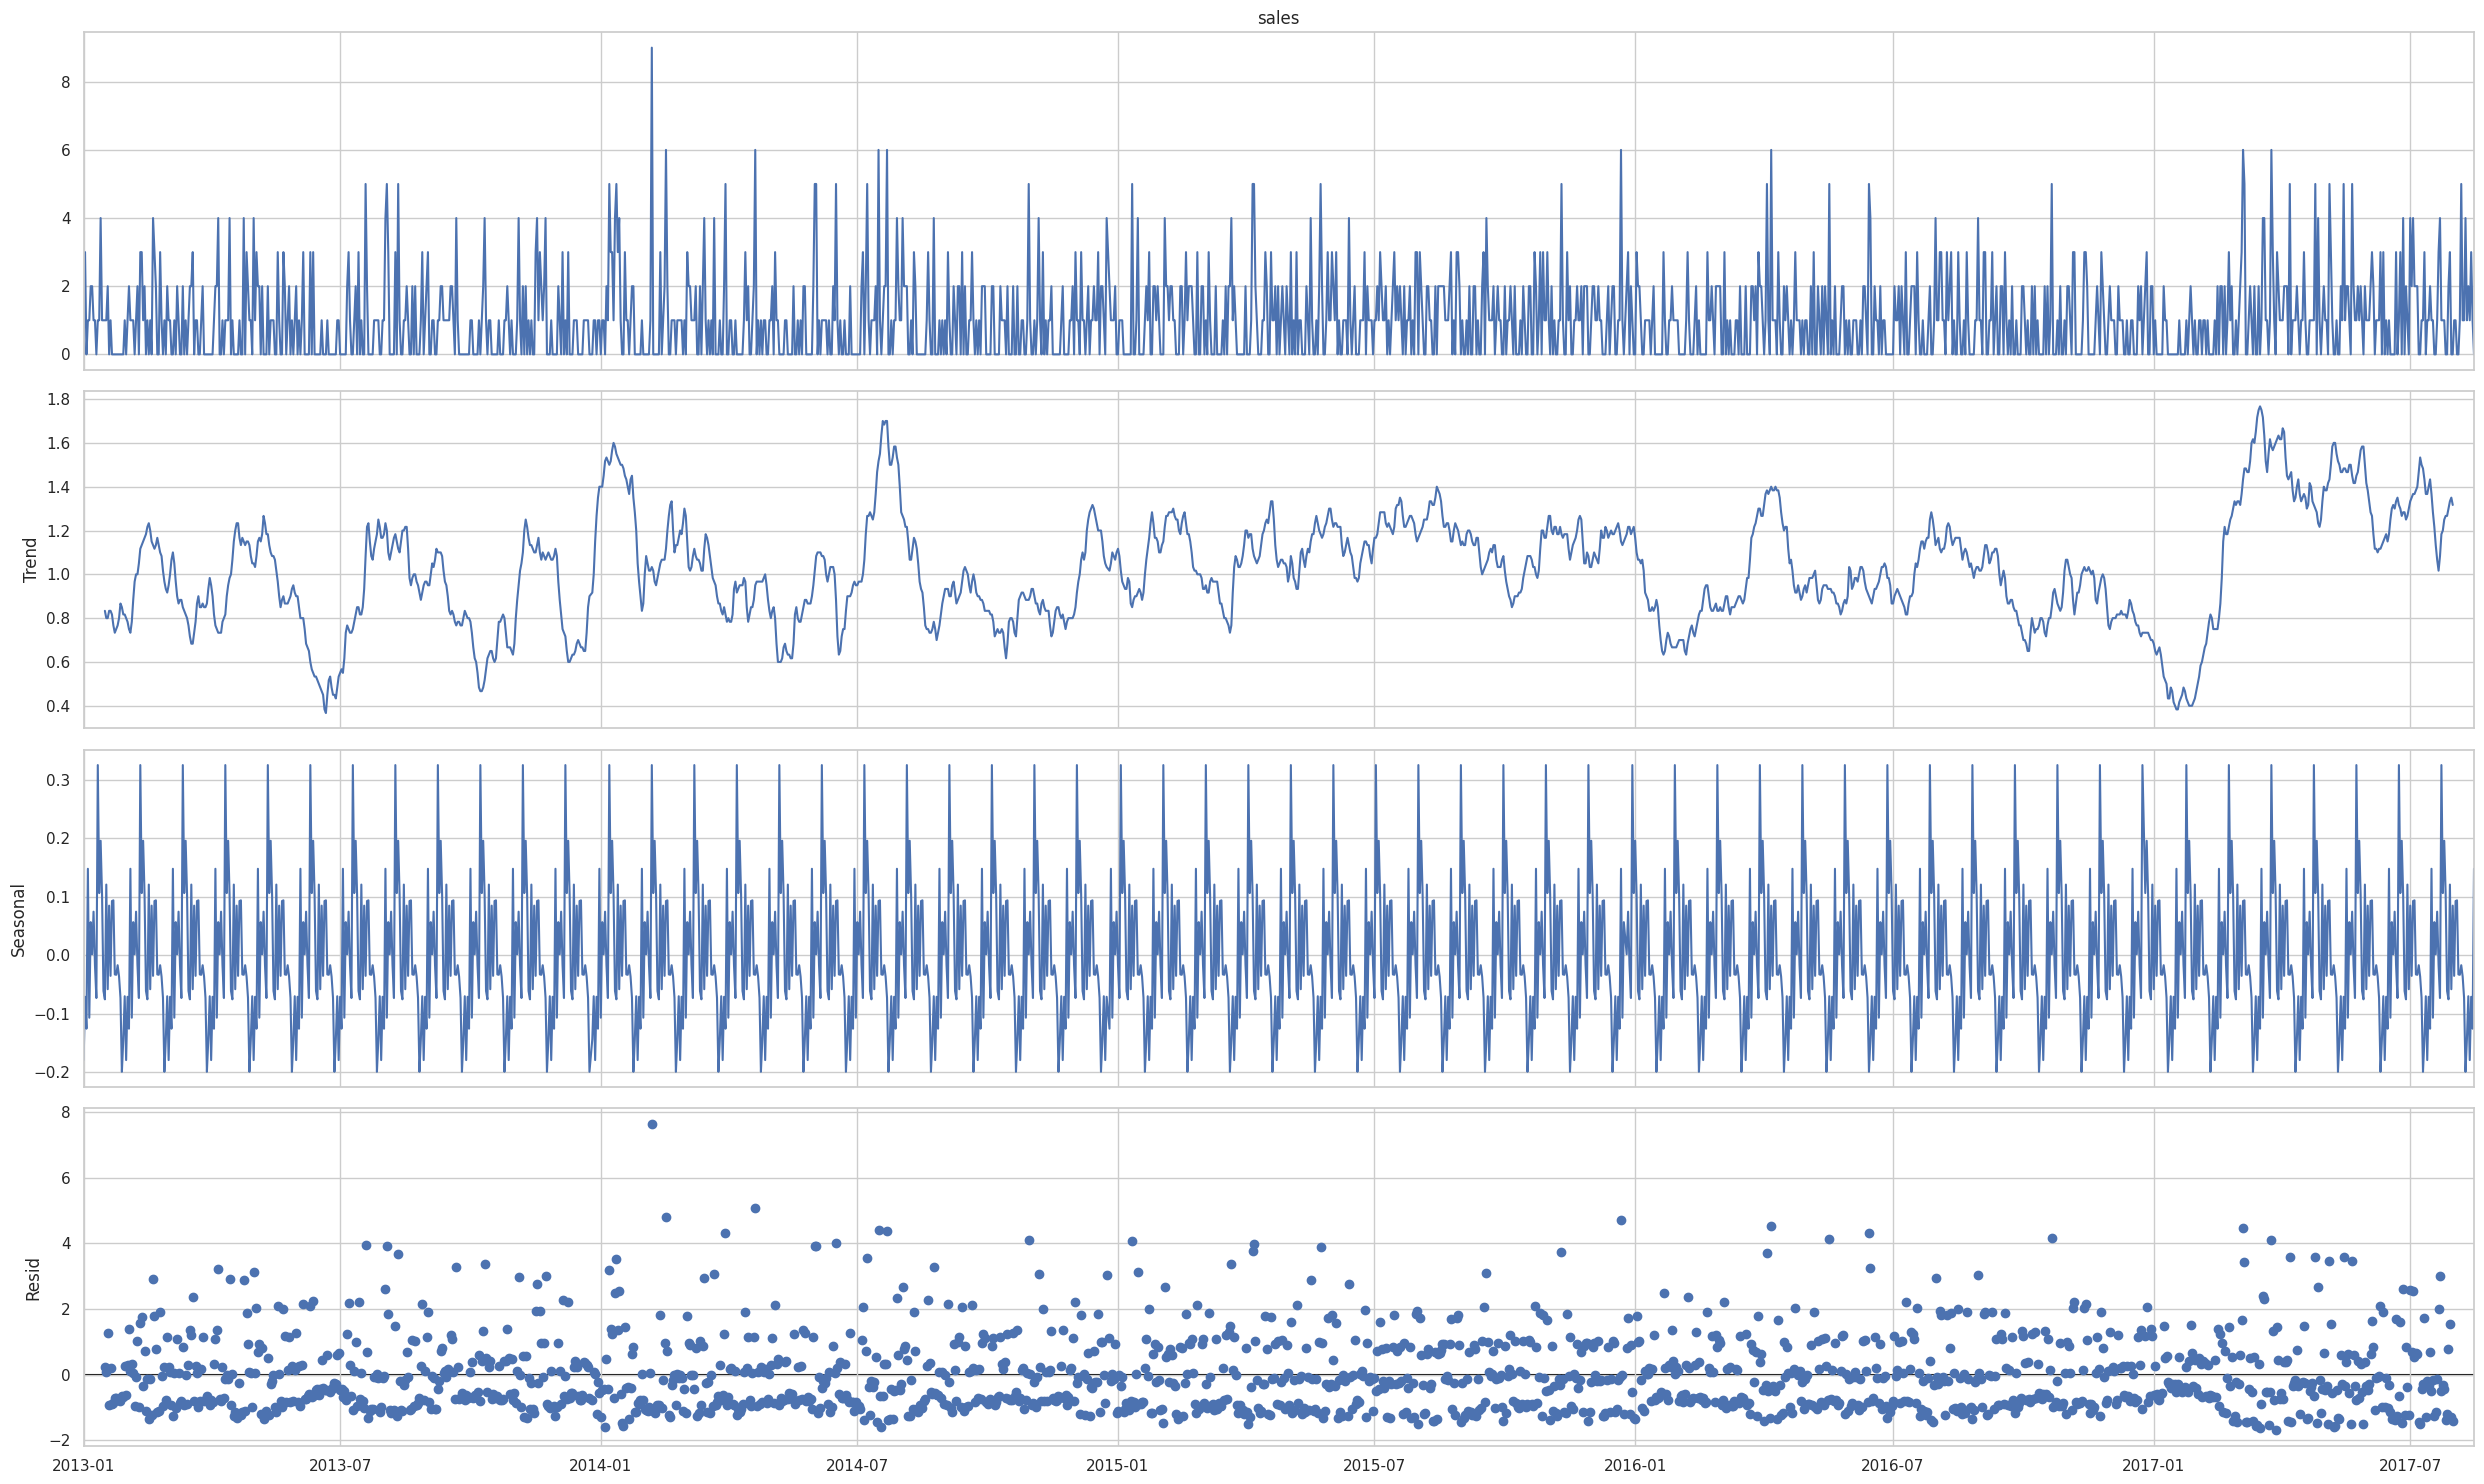

In [ ]:
# Decompose Time Series

# Make fig size bigger
plt.rcParams['figure.figsize'] = (25, 15)
# Decompose time series
decomposition = seasonal_decompose(hardware['sales'], model='additive', period=30)
fig = plt.figure()
fig = decomposition.plot()

#**2_Feature Engineering**

##Impute Empty Cell of features

In [ ]:
hardware

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                           
2013-01-01  HARDWARE    0.0            0         NaN  2013      1     1    1   
2013-01-02  HARDWARE    3.0            0       93.14  2013      1     1    2   
2013-01-03  HARDWARE    0.0            0       92.97  2013      1     1    3   
2013-01-04  HARDWARE    1.0            0       93.12  2013      1     1    4   
2013-01-05  HARDWARE    1.0            0         NaN  2013      1     1    5   
...              ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11  HARDWARE    2.0            0       48.81  2017      8    32   11   
2017-08-12  HARDWARE    1.0            0         NaN  2017      8    32   12   
2017-08-13  HARDWARE    3.0            0         NaN  2017      8    32   13   
2017-08-14  HARDWARE    1.0            0       47.59  2017      8    33   14   
2017-08-15  HARDWARE    0.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
hardware.isnull().sum()

family           0
sales            0
onpromotion      0
dcoilwtico     521
year             0
month            0
week             0
day              0
weekday          0
dtype: int64

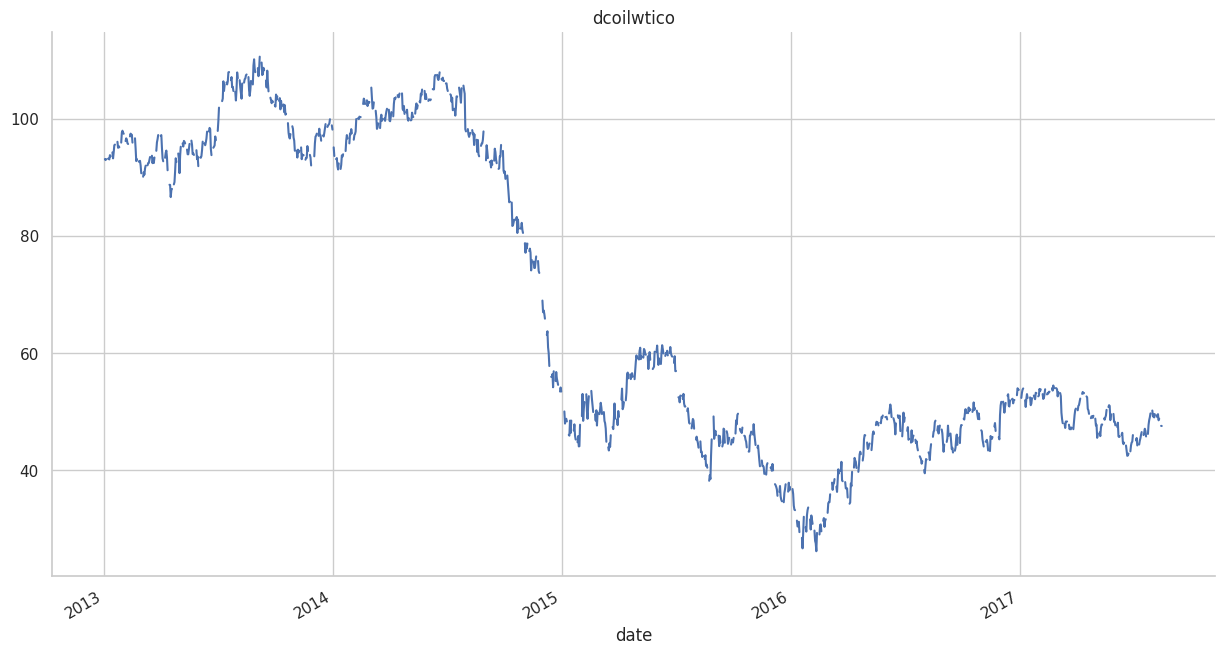

In [ ]:
hardware['dcoilwtico'].plot(kind='line', figsize=(15, 8), title='dcoilwtico')
plt.gca().spines[['top', 'right']].set_visible(False)

###Impute dcoilwtico

In [ ]:
hardware['dcoilwtico'] = hardware['dcoilwtico'].fillna(method='ffill')
hardware

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                           
2013-01-01  HARDWARE    0.0            0         NaN  2013      1     1    1   
2013-01-02  HARDWARE    3.0            0       93.14  2013      1     1    2   
2013-01-03  HARDWARE    0.0            0       92.97  2013      1     1    3   
2013-01-04  HARDWARE    1.0            0       93.12  2013      1     1    4   
2013-01-05  HARDWARE    1.0            0       93.12  2013      1     1    5   
...              ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11  HARDWARE    2.0            0       48.81  2017      8    32   11   
2017-08-12  HARDWARE    1.0            0       48.81  2017      8    32   12   
2017-08-13  HARDWARE    3.0            0       48.81  2017      8    32   13   
2017-08-14  HARDWARE    1.0            0       47.59  2017      8    33   14   
2017-08-15  HARDWARE    0.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
hardware['dcoilwtico'] = hardware['dcoilwtico'].fillna(method='backfill')
hardware

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                           
2013-01-01  HARDWARE    0.0            0       93.14  2013      1     1    1   
2013-01-02  HARDWARE    3.0            0       93.14  2013      1     1    2   
2013-01-03  HARDWARE    0.0            0       92.97  2013      1     1    3   
2013-01-04  HARDWARE    1.0            0       93.12  2013      1     1    4   
2013-01-05  HARDWARE    1.0            0       93.12  2013      1     1    5   
...              ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11  HARDWARE    2.0            0       48.81  2017      8    32   11   
2017-08-12  HARDWARE    1.0            0       48.81  2017      8    32   12   
2017-08-13  HARDWARE    3.0            0       48.81  2017      8    32   13   
2017-08-14  HARDWARE    1.0            0       47.59  2017      8    33   14   
2017-08-15  HARDWARE    0.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
hardware.isnull().sum()

family         0
sales          0
onpromotion    0
dcoilwtico     0
year           0
month          0
week           0
day            0
weekday        0
dtype: int64

In [ ]:
hardware = hardware.drop('family', axis=1)

In [ ]:
hardware

sales  onpromotion  dcoilwtico  year  month  week  day  weekday
date                                                                       
2013-01-01    0.0            0       93.14  2013      1     1    1        1
2013-01-02    3.0            0       93.14  2013      1     1    2        2
2013-01-03    0.0            0       92.97  2013      1     1    3        3
2013-01-04    1.0            0       93.12  2013      1     1    4        4
2013-01-05    1.0            0       93.12  2013      1     1    5        5
...           ...          ...         ...   ...    ...   ...  ...      ...
2017-08-11    2.0            0       48.81  2017      8    32   11        4
2017-08-12    1.0            0       48.81  2017      8    32   12        5
2017-08-13    3.0            0       48.81  2017      8    32   13        6
2017-08-14    1.0            0       47.59  2017      8    33   14        0
2017-08-15    0.0            0       47.57  2017      8    33   15        1

[1684 rows x 8 columns]

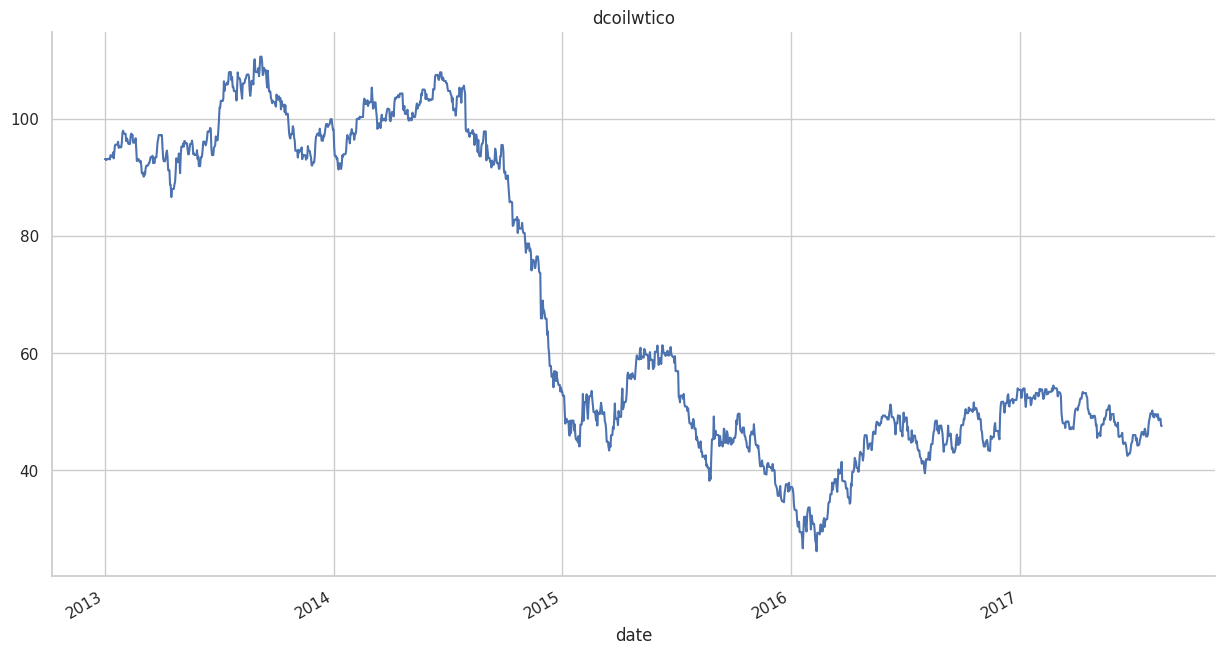

In [ ]:
hardware['dcoilwtico'].plot(kind='line', figsize=(15, 8), title='dcoilwtico')
plt.gca().spines[['top', 'right']].set_visible(False)

##Rolling Window Methode

In [ ]:
# Menambahkan rolling window mean pada sales sepanjang 7 hari
hardware['sales_mean_7'] = hardware['sales'].rolling(window=7).mean()
# Menambahkan rolling window mean pada sales sepanjang 30 hari
hardware['sales_mean_30'] = hardware['sales'].rolling(window=30).mean()
hardware

sales  onpromotion  dcoilwtico  year  month  week  day  weekday  \
date                                                                          
2013-01-01    0.0            0       93.14  2013      1     1    1        1   
2013-01-02    3.0            0       93.14  2013      1     1    2        2   
2013-01-03    0.0            0       92.97  2013      1     1    3        3   
2013-01-04    1.0            0       93.12  2013      1     1    4        4   
2013-01-05    1.0            0       93.12  2013      1     1    5        5   
...           ...          ...         ...   ...    ...   ...  ...      ...   
2017-08-11    2.0            0       48.81  2017      8    32   11        4   
2017-08-12    1.0            0       48.81  2017      8    32   12        5   
2017-08-13    3.0            0       48.81  2017      8    32   13        6   
2017-08-14    1.0            0       47.59  2017      8    33   14        0   
2017-08-15    0.0            0       47.57  2017      8    33   15        1   

            sales_mean_7  sales_mean_30  
date                                     
2013-01-01           NaN            NaN  
2013-01-02           NaN            NaN  
2013-01-03           NaN            NaN  
2013-01-04           NaN            NaN  
2013-01-05           NaN            NaN  
...                  ...            ...  
2017-08-11      2.142857       1.300000  
2017-08-12      2.142857       1.300000  
2017-08-13      1.857143       1.366667  
2017-08-14      1.857143       1.333333  
2017-08-15      1.714286       1.300000  

[1684 rows x 10 columns]

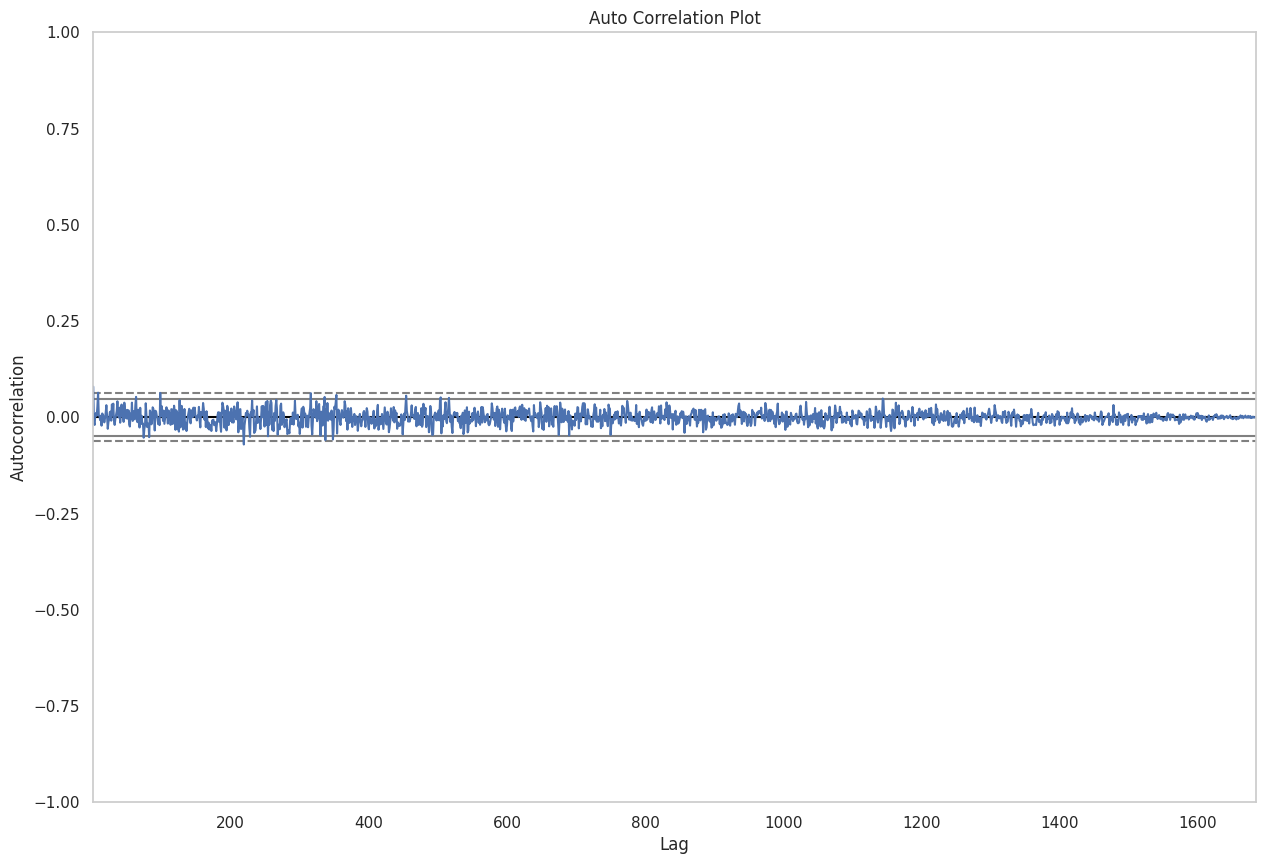

In [ ]:
plt.figure(figsize=(15, 10))
autocorrelation_plot(hardware['sales'])
plt.title('Auto Correlation Plot')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(hardware['sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -37.858056
p-value: 0.000000


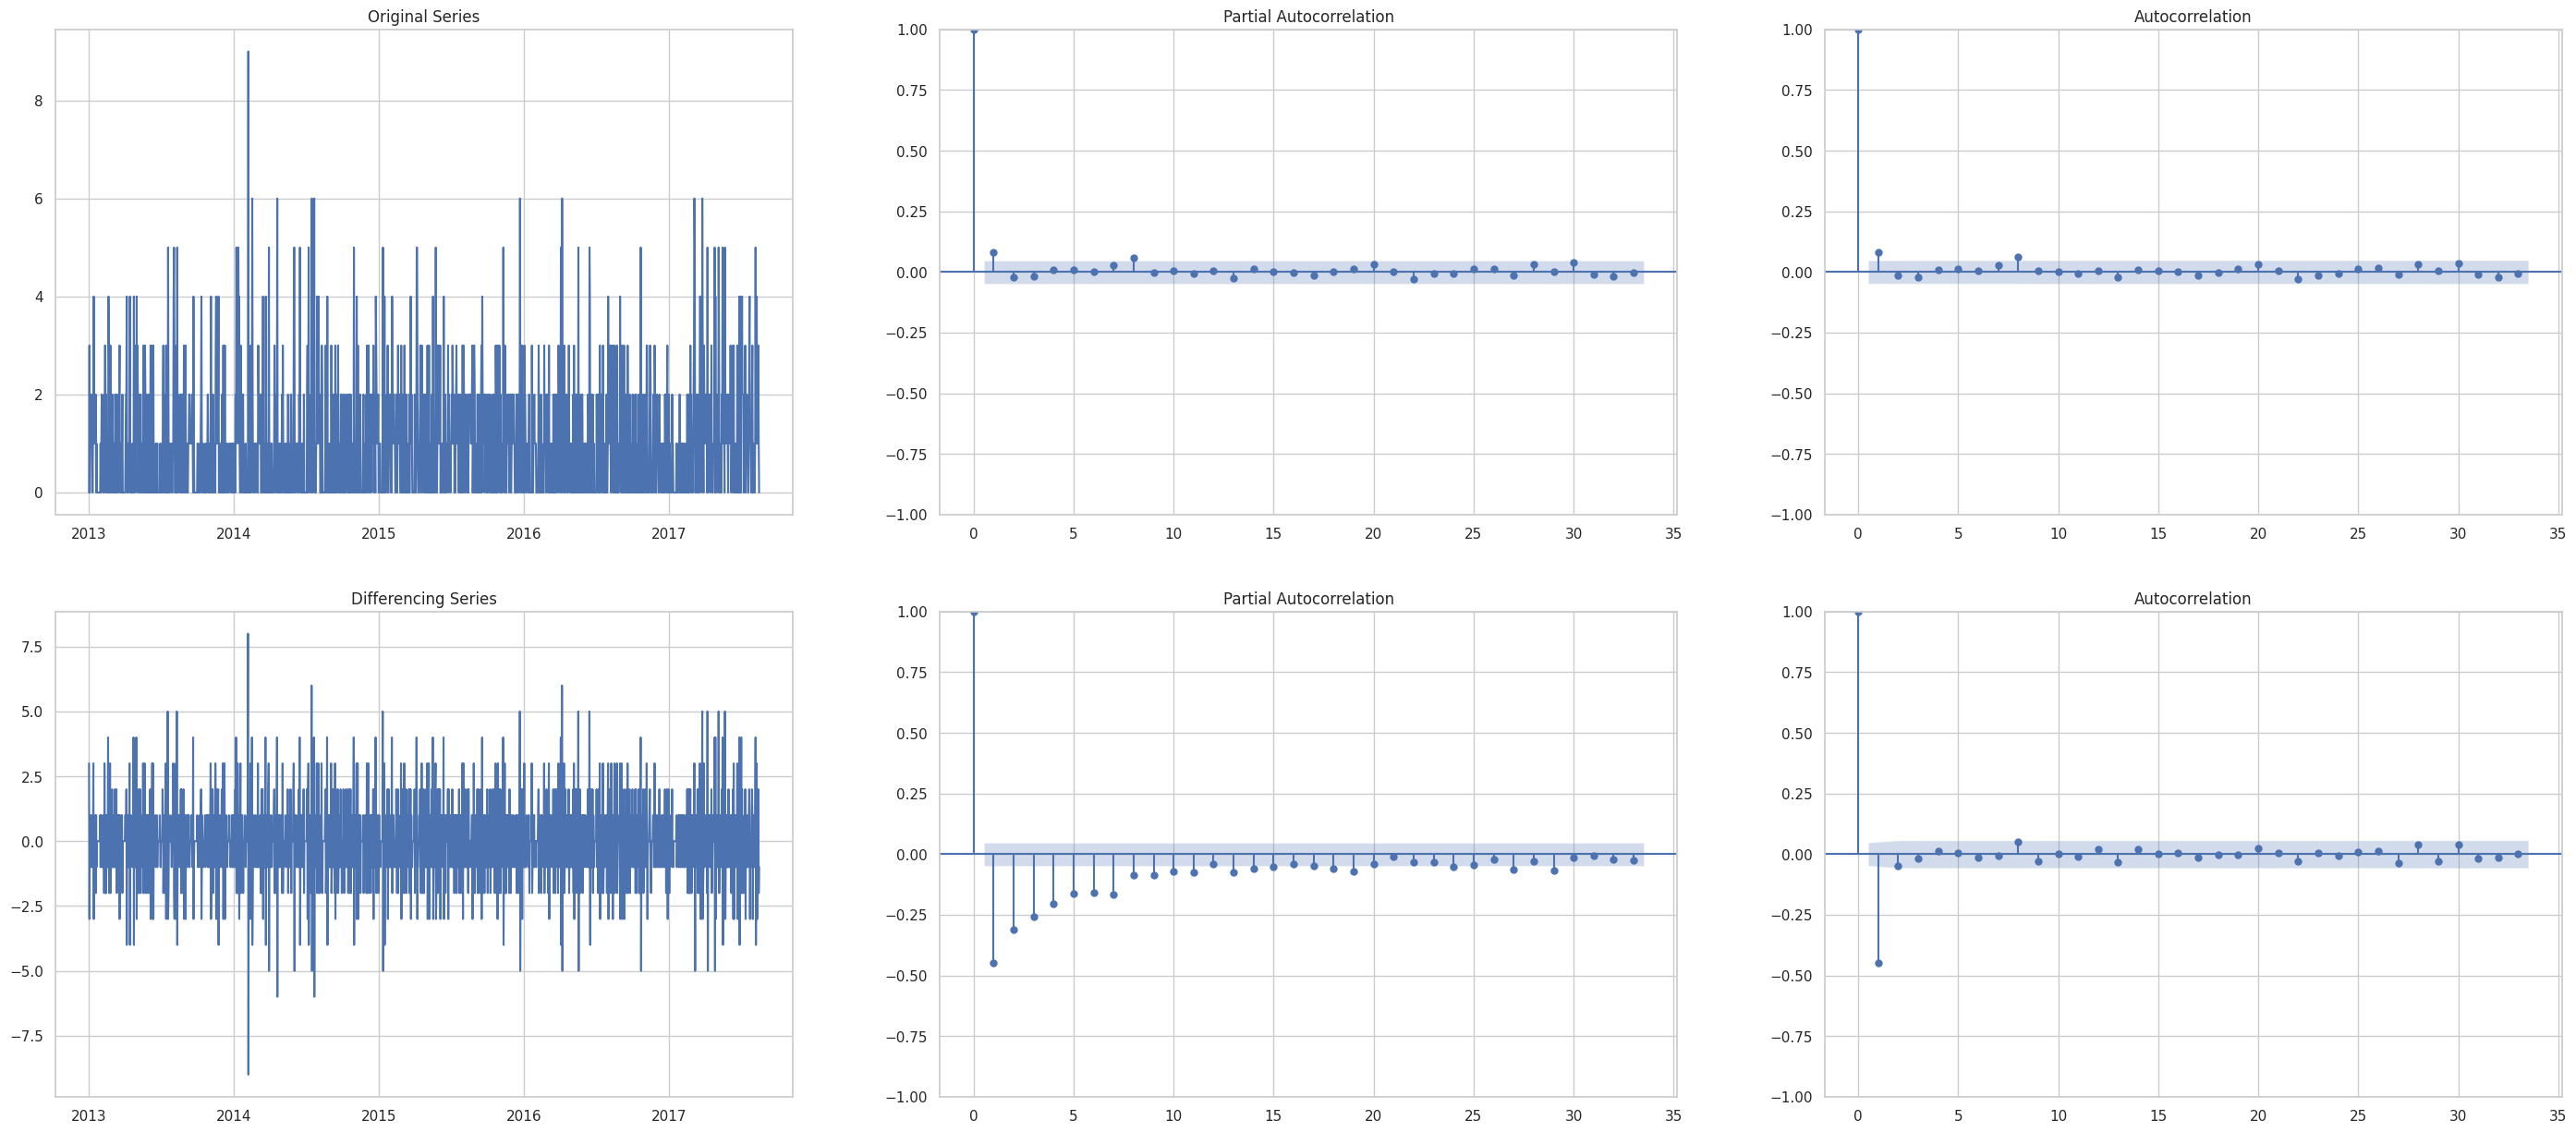

In [ ]:
# Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(35, 15))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(hardware['sales'])
ax[0, 1] = plot_pacf(hardware['sales'], ax=ax[0, 1])
ax[0, 2] = plot_acf(hardware['sales'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(hardware['sales'].diff().dropna())
ax[1, 1] = plot_pacf(hardware['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(hardware['sales'].diff().dropna(), ax=ax[1, 2])

plt.show()

#3_Modelling

##Split Data into Training & Test

In [ ]:
# Split data menjadi data training dan data testing
train = hardware[:-30]
test = hardware[-30:]
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1654, 10)
Test shape: (30, 10)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

##ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

modelArima = ARIMA(train['sales'], order=(20,1,1))
modelArima_fit = modelArima.fit()
print(modelArima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1654
Model:                ARIMA(20, 1, 1)   Log Likelihood               -2648.972
Date:                Fri, 15 Mar 2024   AIC                           5341.943
Time:                        11:29:52   BIC                           5460.971
Sample:                             0   HQIC                          5386.070
                               - 1654                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0772      0.023      3.361      0.001       0.032       0.122
ar.L2         -0.0158      0.027     -0.576      0.565      -0.069       0.038
ar.L3         -0.0190      0.028     -0.685      0.4

###Plot Residual

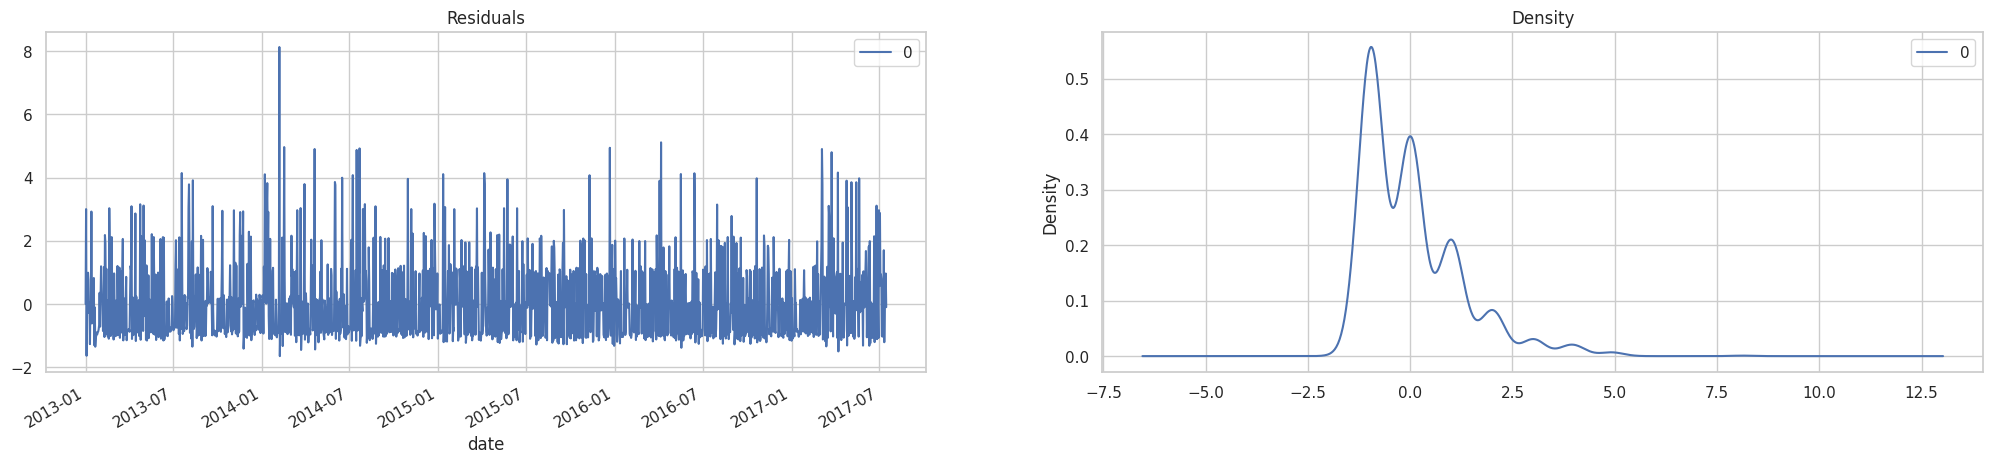

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelArima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


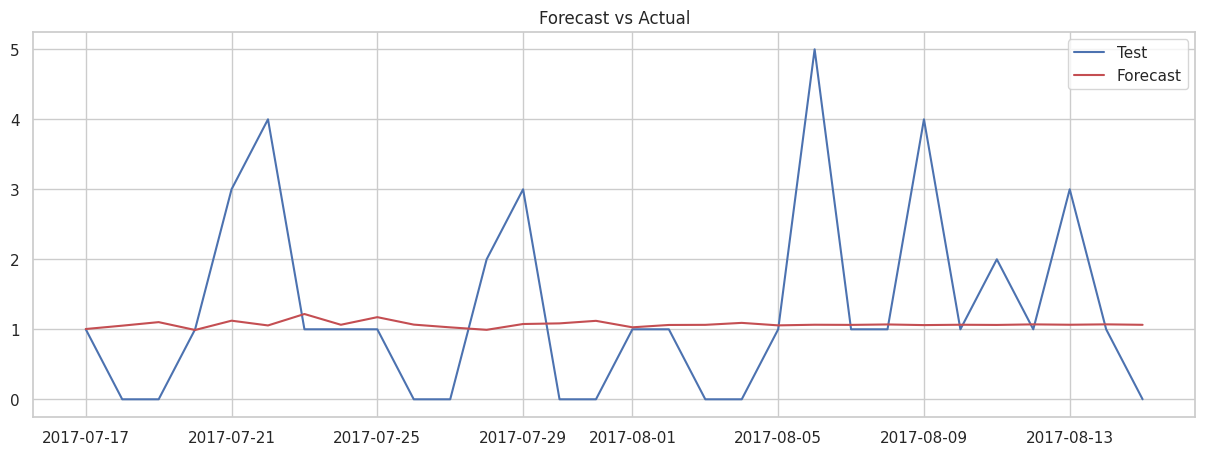

In [ ]:
# Predict data
# Forecast
forecast = modelArima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastARIMA = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastARIMA

test  forecast
date                      
2017-07-17   1.0  1.004241
2017-07-18   0.0  1.051951
2017-07-19   0.0  1.102479
2017-07-20   1.0  0.990213
2017-07-21   3.0  1.123160
2017-07-22   4.0  1.055196
2017-07-23   1.0  1.218407
2017-07-24   1.0  1.064912
2017-07-25   1.0  1.173440
2017-07-26   0.0  1.066981
2017-07-27   0.0  1.027878
2017-07-28   2.0  0.992625
2017-07-29   3.0  1.075640
2017-07-30   0.0  1.084759
2017-07-31   0.0  1.120969
2017-08-01   1.0  1.028562
2017-08-02   1.0  1.061998
2017-08-03   0.0  1.063733
2017-08-04   0.0  1.091828
2017-08-05   1.0  1.056314
2017-08-06   5.0  1.065268
2017-08-07   1.0  1.063032
2017-08-08   1.0  1.069382
2017-08-09   4.0  1.060207
2017-08-10   1.0  1.065237
2017-08-11   2.0  1.062409
2017-08-12   1.0  1.070412
2017-08-13   3.0  1.065141
2017-08-14   1.0  1.070673
2017-08-15   0.0  1.064215

##Auto ARIMA

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
modelAutoArima = pm.auto_arima(train['sales'],
                      start_p=1,        # nilai p pertama
                      start_d=1,        # nilai d pertama
                      start_q=1,        # nilai q pertama
                      test='adf',       # gunakan adftest untuk mencari optimal 'd'
                      max_p=30,          # maksimal p
                      max_d=5,          # maksimal d
                      max_q=10,          # maksimal q
                      #d=2,           # let model determine 'd'
                      m=6,             # frequency of series
                      seasonal=False,    # Seasonality
                      start_P=1,        # nilai P pertama
                      D=1,           # let model determine 'D'
                      start_Q=1,        # nilai Q pertama
                      max_P=11,          # maksimal P
                      max_D=1,          # maksimal D
                      max_Q=1,          # maksimal Q
                      trace=True,       # print result
                      error_action='ignore',    # we don't want to know if an order does not work
                      suppress_warnings=True,   # we don't want convergence warnings
                      stepwise=True)        # set to stepwise

print(modelAutoArima.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (6) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6207.790, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5812.910, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5952.751, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5707.903, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5643.521, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5585.341, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5544.304, Time=0.44 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=5516.626, Time=0.50 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=5489.517, Time=0.56 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=5453.870, Time=0.64 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AIC=5444.899, Time=1.61 sec
 ARIMA(10,0,0)(0,0,0)[0]             : AIC=5435.911, Time=1.82 sec
 ARIMA(11,0,0)(0,0,0)[0]             : AIC=5432.469, Time=2.40 sec
 ARIMA(12,0,0)(0,0,0)[0]            

In [ ]:
modelAutoArima = ARIMA(train['sales'], order=(8,0,0))
modelAutoArima_fit = modelAutoArima.fit()
print(modelArima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1654
Model:                ARIMA(20, 1, 1)   Log Likelihood               -2648.972
Date:                Fri, 15 Mar 2024   AIC                           5341.943
Time:                        11:29:53   BIC                           5460.971
Sample:                             0   HQIC                          5386.070
                               - 1654                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0772      0.023      3.361      0.001       0.032       0.122
ar.L2         -0.0158      0.027     -0.576      0.565      -0.069       0.038
ar.L3         -0.0190      0.028     -0.685      0.4

###Plot Residual

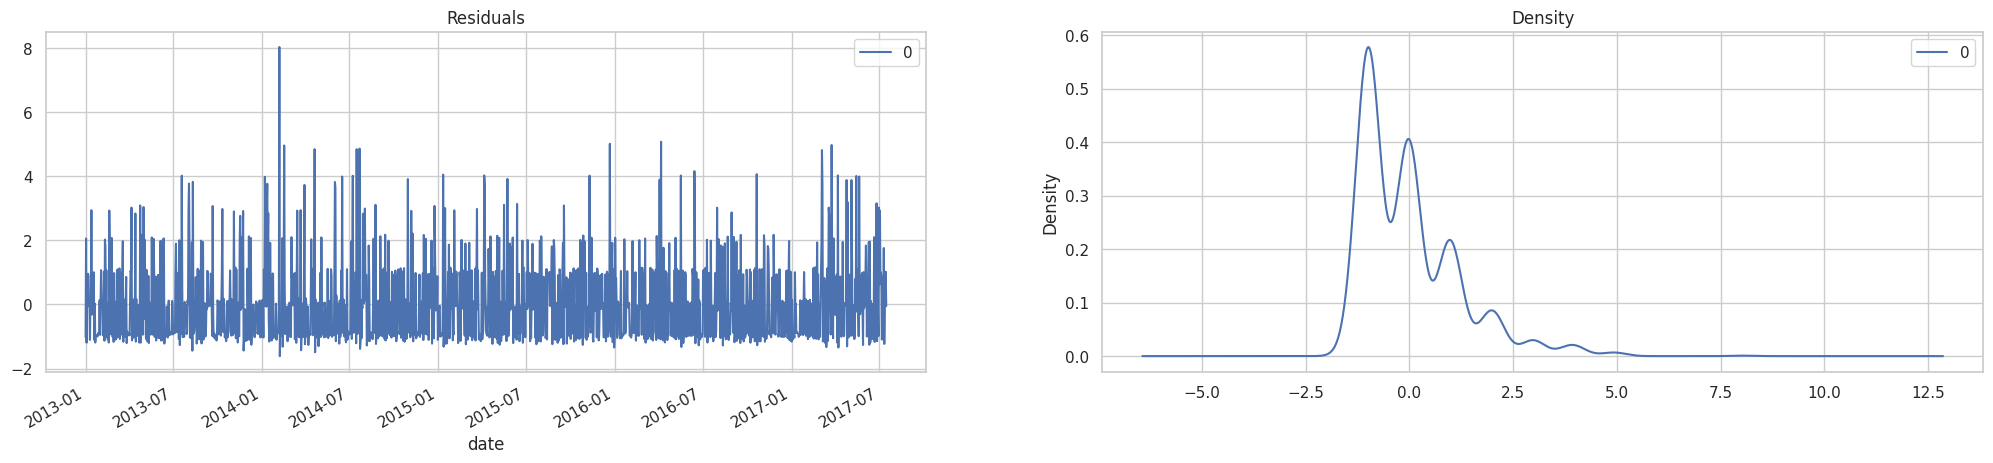

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelAutoArima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


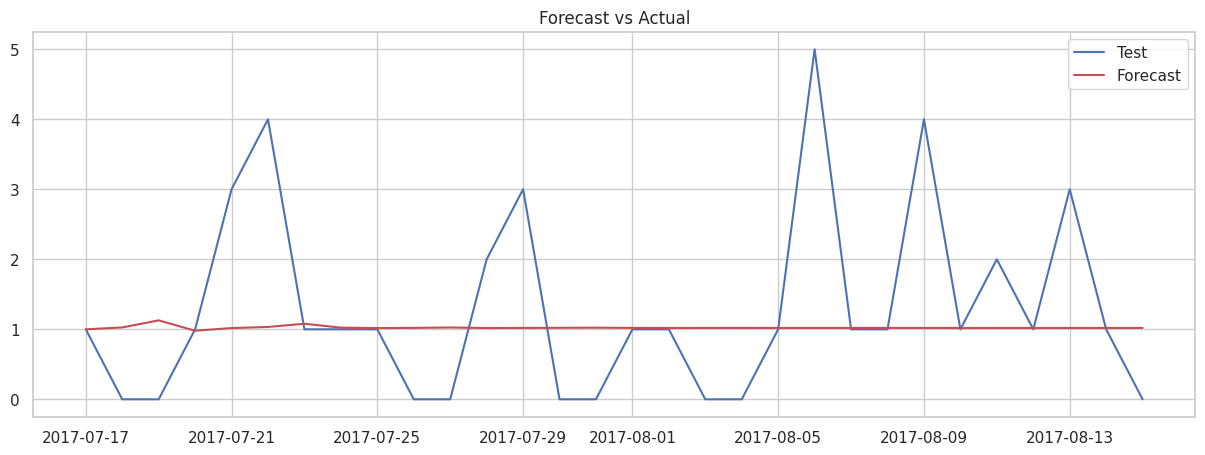

In [ ]:
# Predict data
# Forecast
forecast = modelAutoArima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastAutoArima = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastAutoArima

test  forecast
date                      
2017-07-17   1.0  0.999725
2017-07-18   0.0  1.026531
2017-07-19   0.0  1.127719
2017-07-20   1.0  0.979579
2017-07-21   3.0  1.017662
2017-07-22   4.0  1.033445
2017-07-23   1.0  1.079607
2017-07-24   1.0  1.023445
2017-07-25   1.0  1.017596
2017-07-26   0.0  1.020254
2017-07-27   0.0  1.025825
2017-07-28   2.0  1.018433
2017-07-29   3.0  1.019733
2017-07-30   0.0  1.021235
2017-07-31   0.0  1.023265
2017-08-01   1.0  1.019986
2017-08-02   1.0  1.019324
2017-08-03   0.0  1.019527
2017-08-04   0.0  1.019859
2017-08-05   1.0  1.019486
2017-08-06   5.0  1.019515
2017-08-07   1.0  1.019617
2017-08-08   1.0  1.019696
2017-08-09   4.0  1.019498
2017-08-10   1.0  1.019441
2017-08-11   2.0  1.019455
2017-08-12   1.0  1.019476
2017-08-13   3.0  1.019457
2017-08-14   1.0  1.019456
2017-08-15   0.0  1.019462

##SARIMA

In [ ]:
# Seasonal ARIMA X (SARIMAX)
modelSarima = ARIMA(train['sales'], order=(8, 0, 0), seasonal_order=(0, 1, 1, 2))
modelSarima_fit = modelSarima.fit()
print(modelSarima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1654
Model:             ARIMA(8, 0, 0)x(0, 1, [1], 2)   Log Likelihood               -2652.260
Date:                           Fri, 15 Mar 2024   AIC                           5324.520
Time:                                   11:00:16   BIC                           5378.617
Sample:                                        0   HQIC                          5344.576
                                          - 1654                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0776      0.023      3.356      0.001       0.032       0.123
ar.L2         -0.0159      0.027     -0.592

###Plot Residual

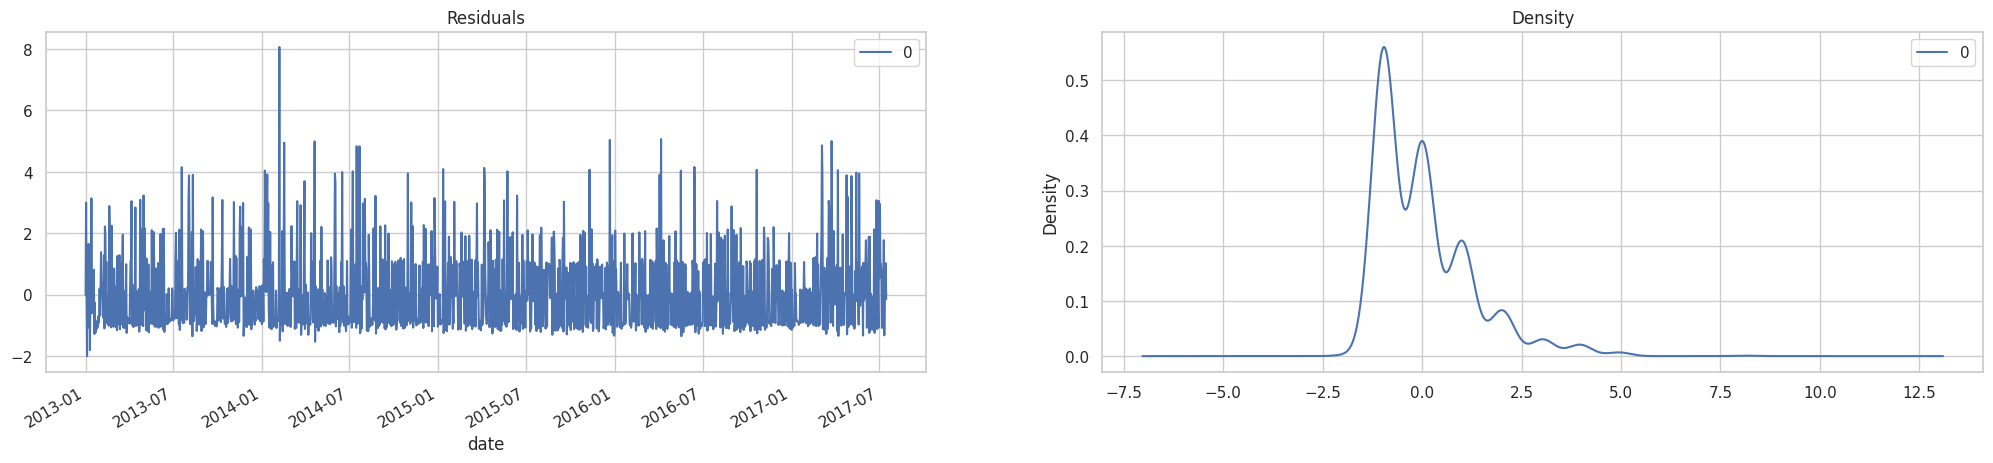

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelSarima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


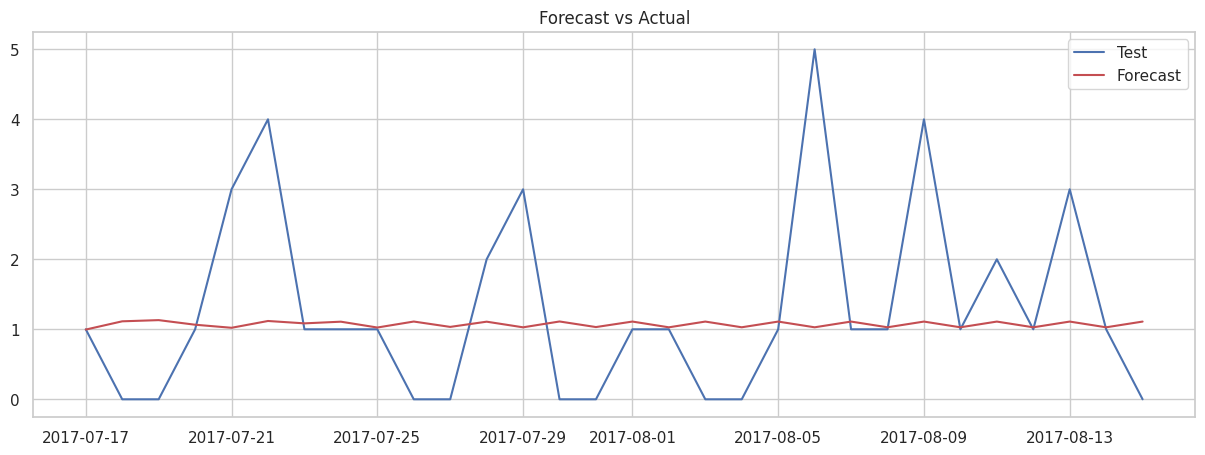

In [ ]:
# Predict data
# Forecast
forecast = modelSarima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastSarima = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastSarima

test  forecast
date                      
2017-07-17   1.0  0.999725
2017-07-18   0.0  1.026531
2017-07-19   0.0  1.127719
2017-07-20   1.0  0.979579
2017-07-21   3.0  1.017662
2017-07-22   4.0  1.033445
2017-07-23   1.0  1.079607
2017-07-24   1.0  1.023445
2017-07-25   1.0  1.017596
2017-07-26   0.0  1.020254
2017-07-27   0.0  1.025825
2017-07-28   2.0  1.018433
2017-07-29   3.0  1.019733
2017-07-30   0.0  1.021235
2017-07-31   0.0  1.023265
2017-08-01   1.0  1.019986
2017-08-02   1.0  1.019324
2017-08-03   0.0  1.019527
2017-08-04   0.0  1.019859
2017-08-05   1.0  1.019486
2017-08-06   5.0  1.019515
2017-08-07   1.0  1.019617
2017-08-08   1.0  1.019696
2017-08-09   4.0  1.019498
2017-08-10   1.0  1.019441
2017-08-11   2.0  1.019455
2017-08-12   1.0  1.019476
2017-08-13   3.0  1.019457
2017-08-14   1.0  1.019456
2017-08-15   0.0  1.019462

##Auto SARIMA

In [ ]:
modelAutoSarima = pm.auto_arima(train['sales'],
                      p = 8,
                      d = 0,
                      q = 0,
                      #d=2,           # let model determine 'd'
                      m=6,             # frequency of series
                      seasonal=True,    # Seasonality
                      start_P=1,        # nilai P pertama
                      D=1,           # let model determine 'D'
                      start_Q=1,        # nilai Q pertama
                      max_P=11,          # maksimal P
                      max_D=1,          # maksimal D
                      max_Q=1,          # maksimal Q
                      trace=True,       # print result
                      error_action='ignore',    # we don't want to know if an order does not work
                      suppress_warnings=True,   # we don't want convergence warnings
                      stepwise=True)        # set to stepwise

print(modelAutoSarima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[6] intercept   : AIC=inf, Time=12.40 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=6429.869, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=5955.737, Time=0.85 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=4.03 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=6427.869, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[6] intercept   : AIC=6425.619, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[6] intercept   : AIC=5776.008, Time=1.48 sec
 ARIMA(1,0,0)(3,1,0)[6] intercept   : AIC=5673.985, Time=3.01 sec
 ARIMA(1,0,0)(4,1,0)[6] intercept   : AIC=5584.505, Time=6.60 sec
 ARIMA(1,0,0)(5,1,0)[6] intercept   : AIC=5528.158, Time=11.02 sec
 ARIMA(1,0,0)(6,1,0)[6] intercept   : AIC=5492.111, Time=16.19 sec
 ARIMA(1,0,0)(7,1,0)[6] intercept   : AIC=5476.761, Time=20.88 sec
 ARIMA(1,0,0)(8,1,0)[6] intercept   : AIC=5469.151, Time=28.36 sec
 ARIMA(1,0,0)(9,1,0)[6] intercept   : AIC=5453.397, Time=33.54 sec
 ARIMA(1,0,0)(10,1,0)[6] intercept   

In [ ]:
modelAutoSarima = ARIMA(train['sales'], order=(8, 0, 0), seasonal_order=(0, 1, 1,7))
modelAutoSarima_fit = model_sarima.fit()
print(modelAutoSarima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:                           sales   No. Observations:                 1654
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2646.383
Date:                         Fri, 15 Mar 2024   AIC                           5304.767
Time:                                 11:10:16   BIC                           5337.232
Sample:                                      0   HQIC                          5316.802
                                        - 1654                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0245      0.077     13.301      0.000       0.874       1.175
ar.L1         -0.0396      0.333     -0.119      0.905     

###Plot Residual

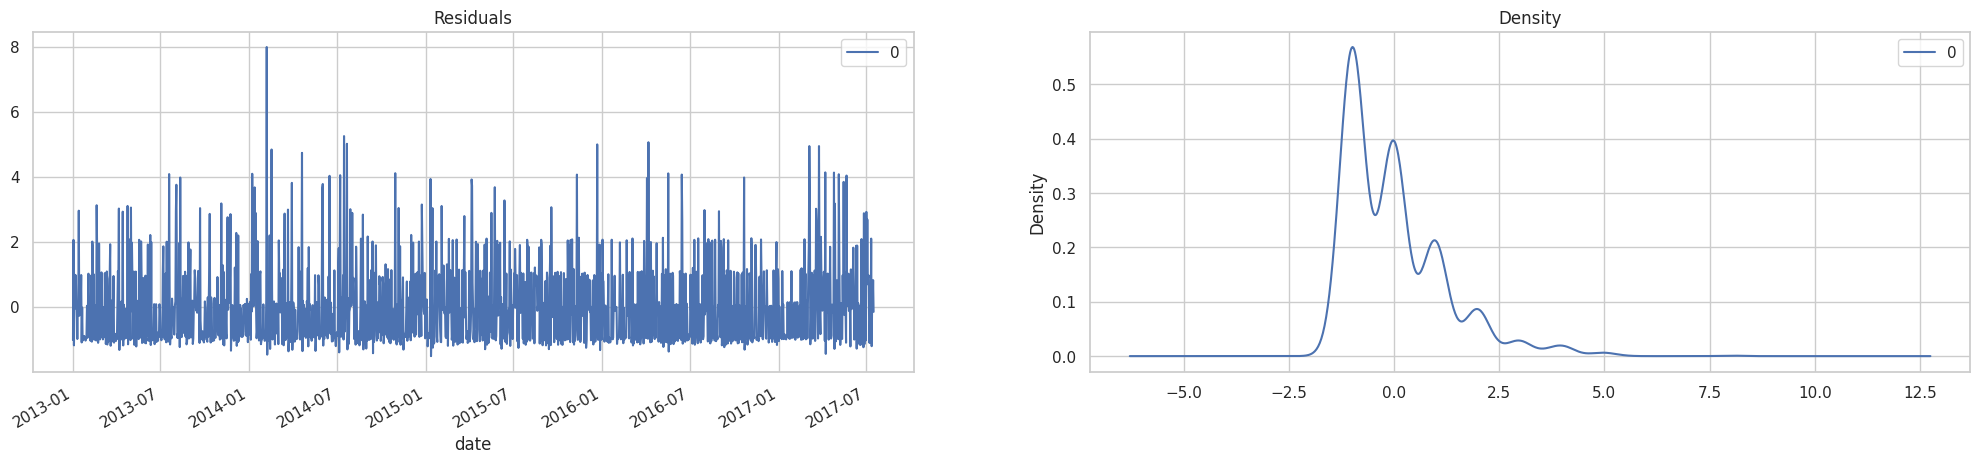

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelAutoSarima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


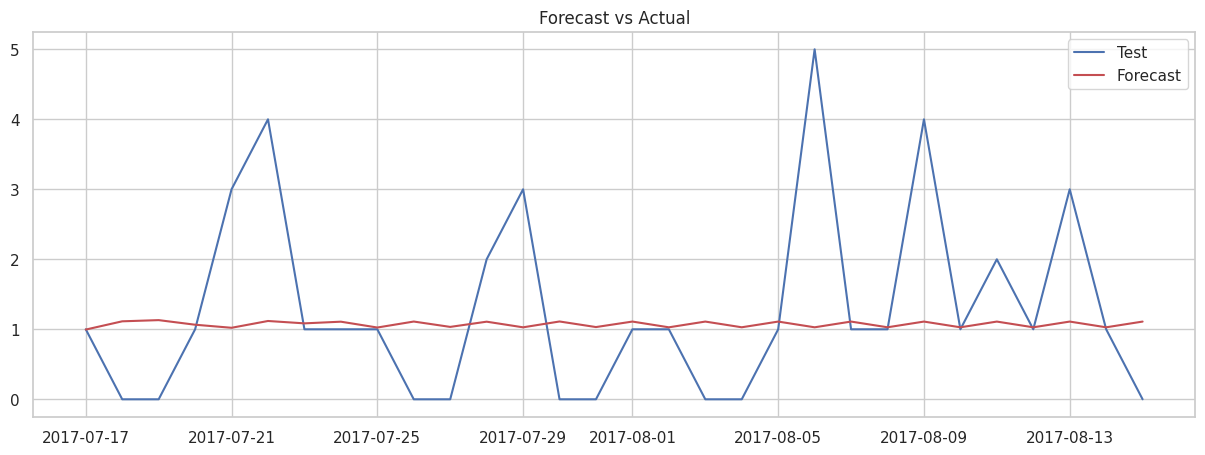

In [ ]:
forecast = modelSarima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastAutoSarima = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastAutoSarima

test  forecast
date                      
2017-07-17   1.0  0.999725
2017-07-18   0.0  1.026531
2017-07-19   0.0  1.127719
2017-07-20   1.0  0.979579
2017-07-21   3.0  1.017662
2017-07-22   4.0  1.033445
2017-07-23   1.0  1.079607
2017-07-24   1.0  1.023445
2017-07-25   1.0  1.017596
2017-07-26   0.0  1.020254
2017-07-27   0.0  1.025825
2017-07-28   2.0  1.018433
2017-07-29   3.0  1.019733
2017-07-30   0.0  1.021235
2017-07-31   0.0  1.023265
2017-08-01   1.0  1.019986
2017-08-02   1.0  1.019324
2017-08-03   0.0  1.019527
2017-08-04   0.0  1.019859
2017-08-05   1.0  1.019486
2017-08-06   5.0  1.019515
2017-08-07   1.0  1.019617
2017-08-08   1.0  1.019696
2017-08-09   4.0  1.019498
2017-08-10   1.0  1.019441
2017-08-11   2.0  1.019455
2017-08-12   1.0  1.019476
2017-08-13   3.0  1.019457
2017-08-14   1.0  1.019456
2017-08-15   0.0  1.019462

##SARIMAX

In [ ]:
# Seasonal ARIMA X (SARIMAX)
modelSarimax = ARIMA(train['sales'], order=(8, 0, 0), seasonal_order=(0, 1, 1, 2),exog=train['onpromotion'])
modelSarimax_fit = modelSarima.fit()
print(modelSarimax_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1654
Model:             ARIMA(8, 0, 0)x(0, 1, [1], 2)   Log Likelihood               -2652.260
Date:                           Fri, 15 Mar 2024   AIC                           5324.520
Time:                                   11:32:08   BIC                           5378.617
Sample:                                        0   HQIC                          5344.576
                                          - 1654                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0776      0.023      3.356      0.001       0.032       0.123
ar.L2         -0.0159      0.027     -0.592

###Plot Residual

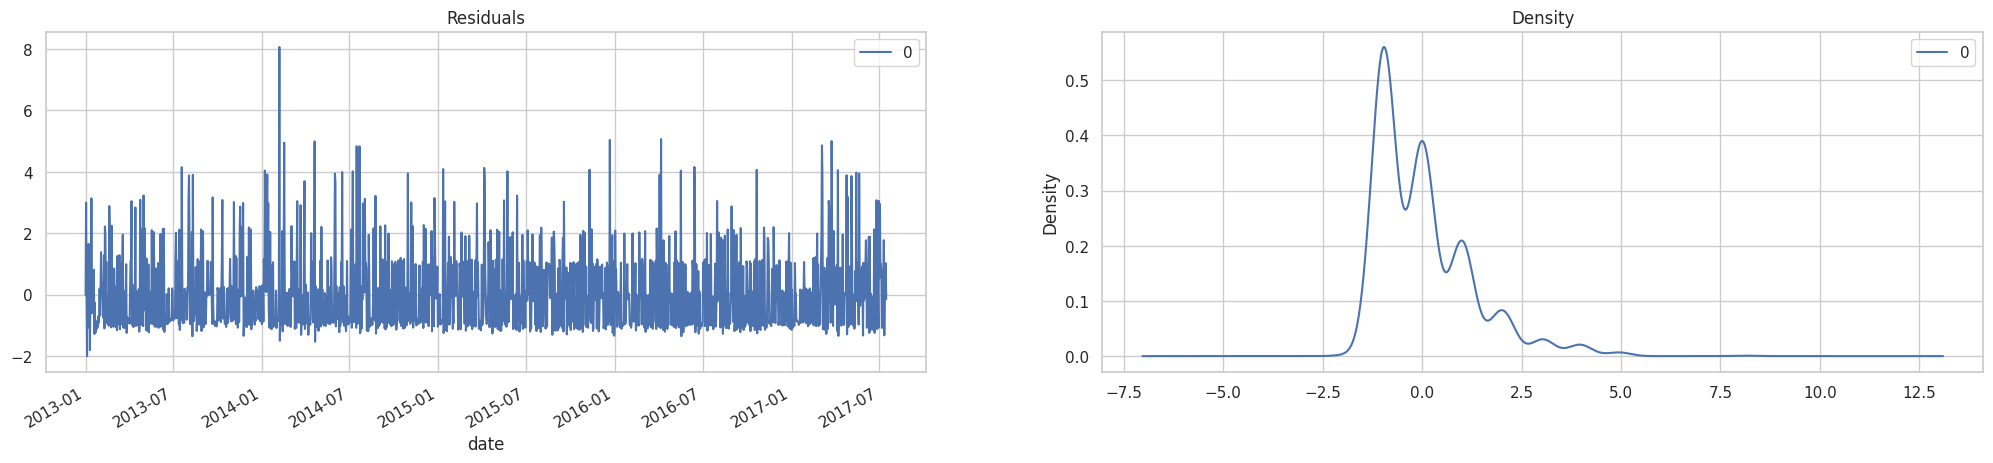

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelSarimax_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


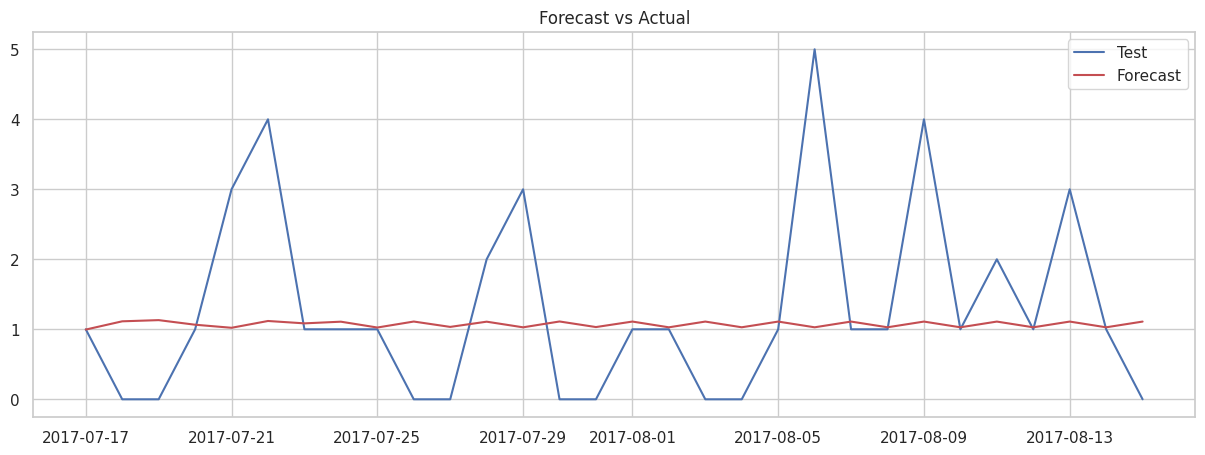

In [ ]:
# Predict data
# Forecast
forecast = modelSarimax_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastSarimax = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastSarimax

test  forecast
date                      
2017-07-17   1.0  0.996290
2017-07-18   0.0  1.114160
2017-07-19   0.0  1.131130
2017-07-20   1.0  1.065505
2017-07-21   3.0  1.021814
2017-07-22   4.0  1.118808
2017-07-23   1.0  1.084898
2017-07-24   1.0  1.108785
2017-07-25   1.0  1.025434
2017-07-26   0.0  1.110928
2017-07-27   0.0  1.034380
2017-07-28   2.0  1.108915
2017-07-29   3.0  1.028356
2017-07-30   0.0  1.111730
2017-07-31   0.0  1.032033
2017-08-01   1.0  1.110553
2017-08-02   1.0  1.028408
2017-08-03   0.0  1.110440
2017-08-04   0.0  1.029000
2017-08-05   1.0  1.110383
2017-08-06   5.0  1.028663
2017-08-07   1.0  1.110523
2017-08-08   1.0  1.028860
2017-08-09   4.0  1.110417
2017-08-10   1.0  1.028635
2017-08-11   2.0  1.110398
2017-08-12   1.0  1.028674
2017-08-13   3.0  1.110398
2017-08-14   1.0  1.028654
2017-08-15   0.0  1.110404

##LSTM

In [ ]:
hardware

sales  onpromotion  dcoilwtico  year  month  week  day  weekday  \
date                                                                          
2013-01-01    0.0            0       93.14  2013      1     1    1        1   
2013-01-02    3.0            0       93.14  2013      1     1    2        2   
2013-01-03    0.0            0       92.97  2013      1     1    3        3   
2013-01-04    1.0            0       93.12  2013      1     1    4        4   
2013-01-05    1.0            0       93.12  2013      1     1    5        5   
...           ...          ...         ...   ...    ...   ...  ...      ...   
2017-08-11    2.0            0       48.81  2017      8    32   11        4   
2017-08-12    1.0            0       48.81  2017      8    32   12        5   
2017-08-13    3.0            0       48.81  2017      8    32   13        6   
2017-08-14    1.0            0       47.59  2017      8    33   14        0   
2017-08-15    0.0            0       47.57  2017      8    33   15        1   

            sales_mean_7  sales_mean_30  
date                                     
2013-01-01           NaN            NaN  
2013-01-02           NaN            NaN  
2013-01-03           NaN            NaN  
2013-01-04           NaN            NaN  
2013-01-05           NaN            NaN  
...                  ...            ...  
2017-08-11      2.142857       1.300000  
2017-08-12      2.142857       1.300000  
2017-08-13      1.857143       1.366667  
2017-08-14      1.857143       1.333333  
2017-08-15      1.714286       1.300000  

[1684 rows x 10 columns]

In [ ]:
# Import min-max scaling function
from sklearn.preprocessing import MinMaxScaler
# Import keras lstm model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Split data
# Scalling

dcoilwtico_scaler = MinMaxScaler()
sales_scaler = MinMaxScaler()
x = hardware[['onpromotion', 'dcoilwtico']].copy()
y = hardware['sales'].copy()

x['dcoilwtico'] = dcoilwtico_scaler.fit_transform(x['dcoilwtico'].values.reshape(-1, 1))
y = sales_scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
def load_data(X, seq_len, test_size=30):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_data = data[:-test_size]  # Exclude last 'test_size' data points for test set

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]

    x_test = data[-test_size:, :-1]
    y_test = data[-test_size:, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

window = 7
x['sales'] = y
X_train, y_train, X_test, y_test = load_data(x, window,test_size=30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1646, 7, 3) (1646,) (30, 7, 3) (30,)


In [ ]:
#LSTM architecture
modelLSTM = Sequential()
# First LSTM layer with Dropout regularisation
modelLSTM.add(LSTM(units=100, input_shape=(window,3)))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


# Compiling the RNN
modelLSTM.compile(optimizer='adam',loss='mse')
# Fitting to the training set
start = time.time()
history1=modelLSTM.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1)
print ('compilation time : ', time.time() - start)

Epoch 1/100
45/45 [==============================] - 6s 25ms/step - loss: 0.0202 - val_loss: 0.0268
Epoch 2/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0179 - val_loss: 0.0256
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 0.0177 - val_loss: 0.0245
Epoch 4/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0177 - val_loss: 0.0256
Epoch 5/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0178 - val_loss: 0.0247
Epoch 6/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0178 - val_loss: 0.0249
Epoch 7/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0177 - val_loss: 0.0254
Epoch 8/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0176 - val_loss: 0.0236
Epoch 9/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0179 - val_loss: 0.0248
Epoch 10/100
45/45 [==============================] - 0s 9ms/step - loss: 0.0177 - val_loss: 0.0246
Epoch 11

In [ ]:
trainPredict = modelLSTM.predict(X_train)
testPredict = modelLSTM.predict(X_test)

trainPredict = sales_scaler.inverse_transform(trainPredict)
trainY = sales_scaler.inverse_transform([y_train])
testPredict = sales_scaler.inverse_transform(testPredict)
testY = sales_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(30, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(30, 1)
print(plot_actual.shape)
print(plot_predicted.shape)

1/1 [==============================] - 0s 37ms/step
(30, 1)
(30, 1)


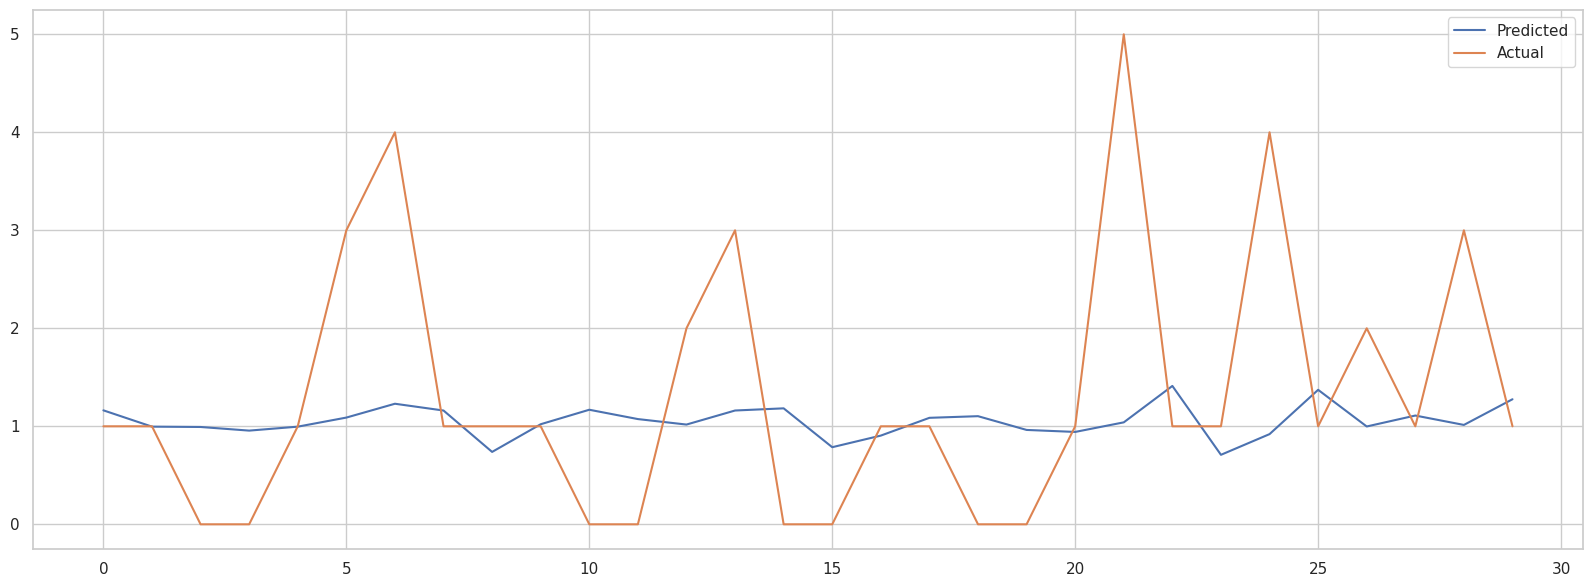

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend(loc='best')
plt.show()

In [ ]:
plot_predicted = plot_predicted.reshape(30,)

forecastLSTM = pd.DataFrame({'test': test['sales'], 'forecast': plot_predicted}, index=test.index)
forecastLSTM

test  forecast
date                      
2017-07-17   1.0  1.162865
2017-07-18   0.0  0.996529
2017-07-19   0.0  0.993134
2017-07-20   1.0  0.956069
2017-07-21   3.0  0.996386
2017-07-22   4.0  1.089065
2017-07-23   1.0  1.230230
2017-07-24   1.0  1.160983
2017-07-25   1.0  0.738692
2017-07-26   0.0  1.021186
2017-07-27   0.0  1.168986
2017-07-28   2.0  1.073790
2017-07-29   3.0  1.017787
2017-07-30   0.0  1.161176
2017-07-31   0.0  1.183322
2017-08-01   1.0  0.786735
2017-08-02   1.0  0.905223
2017-08-03   0.0  1.086568
2017-08-04   0.0  1.103350
2017-08-05   1.0  0.962961
2017-08-06   5.0  0.942589
2017-08-07   1.0  1.040367
2017-08-08   1.0  1.411901
2017-08-09   4.0  0.709114
2017-08-10   1.0  0.920233
2017-08-11   2.0  1.372195
2017-08-12   1.0  0.998169
2017-08-13   3.0  1.109825
2017-08-14   1.0  1.014095
2017-08-15   0.0  1.276124

#4_Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model = [forecastARIMA, forecastAutoArima, forecastSarima, forecastAutoSarima,forecastSarimax, forecastLSTM]
model_name = ['Arima', 'AutoArima', 'Sarima', 'AutoSarima','Sarimax', 'LSTM']
metrics = []

for i in range(len(model)):
    mae = mean_absolute_error(model[i]['test'], model[i]['forecast'])
    mse = mean_squared_error(model[i]['test'], model[i]['forecast'])
    r2 = r2_score(model[i]['test'], model[i]['forecast'])
    metrics.append([mae, mse, r2])

metrics = pd.DataFrame(metrics, columns=['MAE', 'MSE', 'R2'], index=model_name)
metrics

MAE       MSE        R2
Arima       0.937718  1.872635 -0.034605
AutoArima   0.914477  1.895499 -0.047237
Sarima      0.914477  1.895499 -0.047237
AutoSarima  0.914477  1.895499 -0.047237
Sarimax     0.930315  1.869823 -0.033051
LSTM        0.981066  2.003587 -0.106954